In [1]:
import pandas as pd

# Load CSV file
Dataset = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/health_fitness_dataset.csv')

# Display first 5 rows
Dataset.head()

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


In [2]:
#Print dimension
print("Dimensions Train (Rows, Columns):", Dataset.shape)

Dimensions Train (Rows, Columns): (687701, 23)


In [3]:
import pandas as pd

# Verify
print(f"Dataset shape: {Dataset.shape}")       # (8068, 11)

Dataset shape: (687701, 23)


In [4]:
# 3. Check for duplicates
print("Number of duplicate rows:", Dataset.duplicated().sum())

Number of duplicate rows: 0


In [5]:
# 4. Check data types of variables
print("\nData types of each column:")
print(Dataset.dtypes)


Data types of each column:
participant_id                int64
date                         object
age                           int64
gender                       object
height_cm                   float64
weight_kg                   float64
bmi                         float64
activity_type                object
duration_minutes            float64
intensity                    object
calories_burned             float64
daily_steps                   int64
avg_heart_rate                int64
resting_heart_rate          float64
blood_pressure_systolic     float64
blood_pressure_diastolic    float64
endurance_level             float64
sleep_hours                 float64
stress_level                  int64
hydration_level             float64
smoking_status               object
health_condition             object
fitness_level               float64
dtype: object


In [6]:
# Replace NA values in 'health_condition' with "no illness"
Dataset['health_condition'] = Dataset['health_condition'].fillna("healthy")

# Verify the changes
print(Dataset['health_condition'].value_counts(dropna=False))  # Should show no NA values

health_condition
healthy         490275
Hypertension     99437
Diabetes         64754
Asthma           33235
Name: count, dtype: int64


In [7]:
#6. Identify object type columns
object_cols = Dataset.select_dtypes(include=['object']).columns

# Convert object type columns to category
Dataset[object_cols] = Dataset[object_cols].astype('category')

# Verify the conversion
print("Data types after conversion:")
print(Dataset.dtypes)

# Optional: Show memory usage before and after conversion
print("\nMemory usage before conversion:", Dataset.memory_usage(deep=True).sum()/1024, "KB")

Data types after conversion:
participant_id                 int64
date                        category
age                            int64
gender                      category
height_cm                    float64
weight_kg                    float64
bmi                          float64
activity_type               category
duration_minutes             float64
intensity                   category
calories_burned              float64
daily_steps                    int64
avg_heart_rate                 int64
resting_heart_rate           float64
blood_pressure_systolic      float64
blood_pressure_diastolic     float64
endurance_level              float64
sleep_hours                  float64
stress_level                   int64
hydration_level              float64
smoking_status              category
health_condition            category
fitness_level                float64
dtype: object

Memory usage before conversion: 96066.990234375 KB


In [8]:
# Number of unique activity types
num_activity_types = Dataset['activity_type'].nunique()

# List of unique activity types
activity_types = Dataset['activity_type'].unique()

# Print results
print("Number of activity types:", num_activity_types)
print("List of activity types:", activity_types)


Number of activity types: 10
List of activity types: ['Dancing', 'Swimming', 'Weight Training', 'HIIT', 'Running', 'Walking', 'Tennis', 'Basketball', 'Yoga', 'Cycling']
Categories (10, object): ['Basketball', 'Cycling', 'Dancing', 'HIIT', ..., 'Tennis', 'Walking', 'Weight Training', 'Yoga']


In [9]:
# Number of unique activity types
num_ID_types = Dataset['participant_id'].nunique()

# List of unique activity types
ID_types = Dataset['participant_id'].unique()

# Print results
print("Number of id types:", num_ID_types)
print("List of id types:", ID_types)


Number of id types: 3000
List of id types: [   1    2    3 ... 2998 2999 3000]


In [10]:
# Define mapping dictionary
activity_map = {
    'Running': 'High-Impact Cardio',
    'Cycling': 'Low-Impact Cardio',
    'Walking': 'Low-Impact Cardio',
    'Swimming': 'High-Impact Cardio',
    'Tennis': 'Sport-Based Cardio',
    'Basketball': 'Sport-Based Cardio',
    'Weight Training': 'Strength',
    'HIIT': 'Strength',
    'Yoga': 'Yoga',
    'Dancing': 'Recreational'
}

# Apply mapping
Dataset['activity_group'] = Dataset['activity_type'].map(activity_map)


In [11]:
# Select the first 10 participants
first_10_ids = Dataset['participant_id'].unique()[:5]

# Loop through each participant and calculate activity proportions
for pid in first_10_ids:
    # Filter data for this participant
    participant_data = Dataset[Dataset['participant_id'] == pid]
    
    # Count occurrences of each activity type
    activity_counts = participant_data['activity_group'].value_counts()
    
    # Calculate proportions (frequency / total)
    activity_proportions = activity_counts / activity_counts.sum()
    
    # Print results
    print(f"\nParticipant ID = {pid}")
    for activity, proportion in activity_proportions.items():
        print(f"{activity} = {proportion:.2f}")



Participant ID = 1
Strength = 0.27
Sport-Based Cardio = 0.22
Yoga = 0.15
High-Impact Cardio = 0.14
Low-Impact Cardio = 0.12
Recreational = 0.09

Participant ID = 2
Low-Impact Cardio = 0.33
High-Impact Cardio = 0.24
Sport-Based Cardio = 0.17
Strength = 0.14
Recreational = 0.10
Yoga = 0.01

Participant ID = 3
Low-Impact Cardio = 0.28
Sport-Based Cardio = 0.22
Strength = 0.17
Yoga = 0.13
High-Impact Cardio = 0.12
Recreational = 0.08

Participant ID = 4
Strength = 0.23
Low-Impact Cardio = 0.22
Sport-Based Cardio = 0.22
High-Impact Cardio = 0.20
Yoga = 0.07
Recreational = 0.06

Participant ID = 5
Strength = 0.23
Low-Impact Cardio = 0.23
Sport-Based Cardio = 0.22
High-Impact Cardio = 0.13
Recreational = 0.10
Yoga = 0.09


In [12]:
import pandas as pd

# Helper functions
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

def top3_activities(series):
    return ', '.join(series.value_counts().head(3).index)

def top2_intensities(series):
    return ', '.join(series.value_counts().head(2).index)

# Perform the aggregation
agg_dict = {
    'age': 'first',
    'gender': 'first',
    'height_cm': 'first',
    'weight_kg': 'last',
    'bmi': 'last',
    'activity_group': top3_activities,
    'duration_minutes': 'mean',
    'intensity': top2_intensities,  # <-- updated here
    'calories_burned': 'mean',
    'daily_steps': 'mean',
    'avg_heart_rate': 'mean',
    'resting_heart_rate': 'mean',
    'blood_pressure_systolic': 'mean',
    'blood_pressure_diastolic': 'mean',
    'endurance_level': 'last',
    'fitness_level': 'mean',
    'sleep_hours': 'mean',
    'stress_level': mode,
    'hydration_level': 'mean',
    'smoking_status': mode,
    'health_condition': 'last'
}

# Group and aggregate
temporal_agg = Dataset.groupby('participant_id').agg(agg_dict)

# Flatten multi-level columns (if any)
temporal_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in temporal_agg.columns]

# Reset index for clean dataset
temporal_agg = temporal_agg.reset_index()

# View the first few rows
print(temporal_agg.head())


   participant_id  age gender  height_cm  weight_kg    bmi  \
0               1   56      F      165.3      54.48  19.94   
1               2   40      M      177.6      71.89  22.79   
2               3   23      F      158.4      53.33  21.25   
3               4   37      F      167.2      67.90  24.29   
4               5   50      M      172.0      58.81  19.88   

                                      activity_group  duration_minutes  \
0                 Strength, Sport-Based Cardio, Yoga         74.948927   
1  Low-Impact Cardio, High-Impact Cardio, Sport-B...         75.361983   
2    Low-Impact Cardio, Sport-Based Cardio, Strength         79.172247   
3    Strength, Low-Impact Cardio, Sport-Based Cardio         66.669362   
4    Strength, Low-Impact Cardio, Sport-Based Cardio         71.305727   

     intensity  calories_burned  ...  resting_heart_rate  \
0  Medium, Low        13.428755  ...                69.5   
1  Medium, Low        17.810744  ...                82.1   
2 

In [13]:
print(temporal_agg.dtypes)

participant_id                 int64
age                            int64
gender                      category
height_cm                    float64
weight_kg                    float64
bmi                          float64
activity_group                object
duration_minutes             float64
intensity                     object
calories_burned              float64
daily_steps                  float64
avg_heart_rate               float64
resting_heart_rate           float64
blood_pressure_systolic      float64
blood_pressure_diastolic     float64
endurance_level              float64
fitness_level                float64
sleep_hours                  float64
stress_level                   int64
hydration_level              float64
smoking_status              category
health_condition            category
dtype: object


In [14]:
import pandas as pd

# Verify
print(f"Dataset shape: {temporal_agg.shape}")  

Dataset shape: (3000, 22)


In [15]:
# Convert the specified columns to categorical
temporal_agg['stress_level'] = temporal_agg['stress_level'].astype('category')

# Verify the changes
print(temporal_agg[['stress_level']].dtypes)

stress_level    category
dtype: object


In [16]:
# List of categorical columns (object dtype)
categorical_cols = ['gender', 'activity_group', 'intensity', 'smoking_status', 'health_condition','stress_level']

# Display unique categories and their counts for each categorical variable
for col in categorical_cols:
    print(f"\n--- Categories in '{col}': ---")
    print(temporal_agg[col].value_counts(dropna=False))  # dropna=False shows missing values too


--- Categories in 'gender': ---
gender
F        1480
M        1456
Other      64
Name: count, dtype: int64

--- Categories in 'activity_group': ---
activity_group
Strength, Low-Impact Cardio, High-Impact Cardio     114
Strength, Low-Impact Cardio, Sport-Based Cardio     111
Sport-Based Cardio, Strength, High-Impact Cardio    108
Low-Impact Cardio, Strength, High-Impact Cardio     108
Strength, Sport-Based Cardio, High-Impact Cardio    106
                                                   ... 
Yoga, Strength, Sport-Based Cardio                    1
Sport-Based Cardio, Recreational, Yoga                1
Sport-Based Cardio, Yoga, Recreational                1
Yoga, High-Impact Cardio, Low-Impact Cardio           1
Recreational, Yoga, Sport-Based Cardio                1
Name: count, Length: 109, dtype: int64

--- Categories in 'intensity': ---
intensity
Medium, Low     2947
Medium, High      51
Low, Medium        2
Name: count, dtype: int64

--- Categories in 'smoking_status': ---
smoki

In [17]:
# Remove 'participant_id' column
temporal_agg = temporal_agg.drop('participant_id', axis=1)
temporal_agg = temporal_agg.drop('bmi', axis=1)



In [18]:
# Calculate BMI and add it as a new column
temporal_agg['bmi'] = temporal_agg['weight_kg'] / ((temporal_agg['height_cm'] / 100) ** 2)

# Display first few rows to check
print(temporal_agg[['weight_kg', 'height_cm', 'bmi']].head())


   weight_kg  height_cm        bmi
0      54.48      165.3  19.938450
1      71.89      177.6  22.792007
2      53.33      158.4  21.255006
3      67.90      167.2  24.288306
4      58.81      172.0  19.878989


In [19]:
temporal_agg['activity_group'] = (
    temporal_agg['activity_group']
    .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
)


In [20]:
temporal_agg['activity_group'].nunique()

20

In [21]:
#temporal_agg['intensity'] = (
 #   temporal_agg['intensity']
  #  .apply(lambda x: ','.join(sorted([i.strip() for i in x.split(',')])))
#)


In [22]:
#temporal_agg['intensity'].nunique()

In [23]:
from sklearn.model_selection import train_test_split
train_new, test_new = train_test_split(
    temporal_agg,
    test_size=0.2,  # Adjust ratio
    stratify=temporal_agg['health_condition']  # Preserve class balance
)

# Verify shapes
print("Training set shape:", train_new.shape)
print("Testing set shape:", test_new.shape)

# Check class distribution (optional)
print("\nClass balance in Training set:")
print(train_new['health_condition'].value_counts(normalize=True))

print("\nClass balance in Testing set:")
print(test_new['health_condition'].value_counts(normalize=True))


Training set shape: (2400, 21)
Testing set shape: (600, 21)

Class balance in Training set:
health_condition
healthy         0.712917
Hypertension    0.144583
Diabetes        0.094167
Asthma          0.048333
Name: proportion, dtype: float64

Class balance in Testing set:
health_condition
healthy         0.711667
Hypertension    0.145000
Diabetes        0.095000
Asthma          0.048333
Name: proportion, dtype: float64


In [24]:
# 9. Check for missing values
print("\nMissing values per column(train):")
print(train_new.isnull().sum())
print("\nMissing values per column(test):")
print(test_new.isnull().sum())


Missing values per column(train):
age                         0
gender                      0
height_cm                   0
weight_kg                   0
activity_group              0
duration_minutes            0
intensity                   0
calories_burned             0
daily_steps                 0
avg_heart_rate              0
resting_heart_rate          0
blood_pressure_systolic     0
blood_pressure_diastolic    0
endurance_level             0
fitness_level               0
sleep_hours                 0
stress_level                0
hydration_level             0
smoking_status              0
health_condition            0
bmi                         0
dtype: int64

Missing values per column(test):
age                         0
gender                      0
height_cm                   0
weight_kg                   0
activity_group              0
duration_minutes            0
intensity                   0
calories_burned             0
daily_steps                 0
avg_heart_rate    

In [25]:
print("Data types after conversion (train):")
print(train_new.dtypes)
print("Data types after conversion (test):")
print(test_new.dtypes)

Data types after conversion (train):
age                            int64
gender                      category
height_cm                    float64
weight_kg                    float64
activity_group                object
duration_minutes             float64
intensity                     object
calories_burned              float64
daily_steps                  float64
avg_heart_rate               float64
resting_heart_rate           float64
blood_pressure_systolic      float64
blood_pressure_diastolic     float64
endurance_level              float64
fitness_level                float64
sleep_hours                  float64
stress_level                category
hydration_level              float64
smoking_status              category
health_condition            category
bmi                          float64
dtype: object
Data types after conversion (test):
age                            int64
gender                      category
height_cm                    float64
weight_kg                

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\3364010001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_new, x=col, palette='viridis')


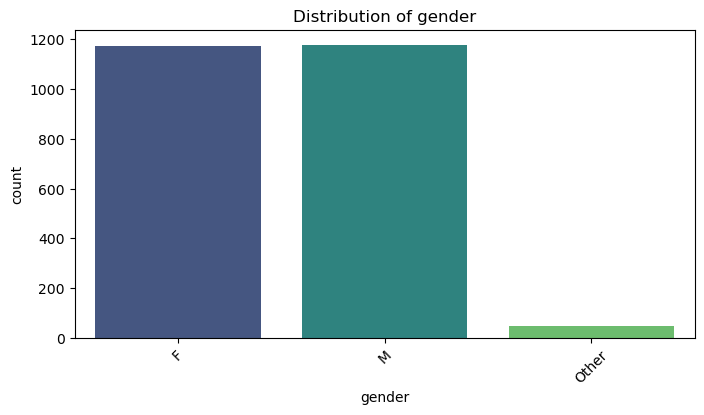

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\3364010001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_new, x=col, palette='viridis')



Value counts for gender:
gender
M        0.491250
F        0.488333
Other    0.020417
Name: proportion, dtype: float64


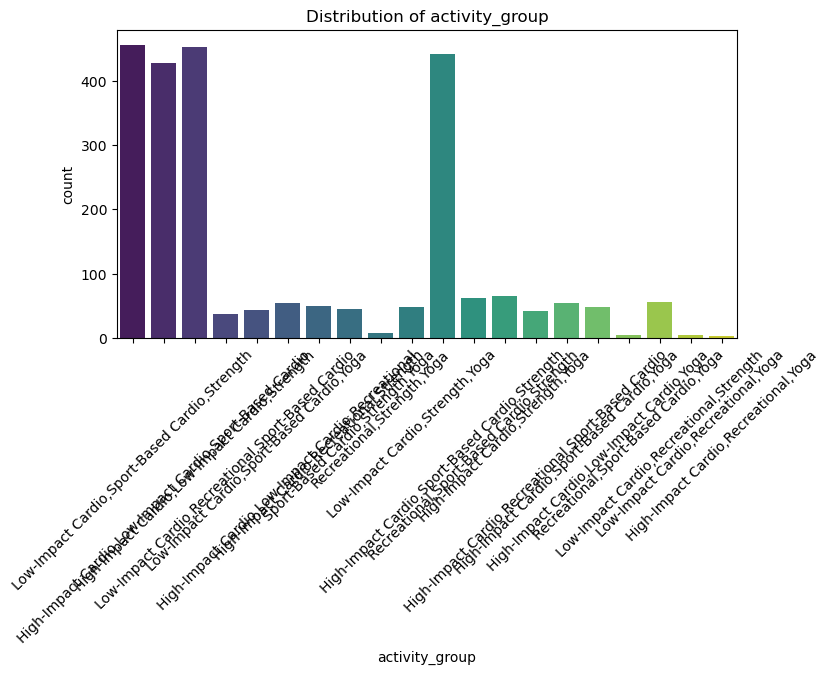


Value counts for activity_group:
activity_group
Low-Impact Cardio,Sport-Based Cardio,Strength              0.190000
High-Impact Cardio,Low-Impact Cardio,Strength              0.188333
High-Impact Cardio,Sport-Based Cardio,Strength             0.183750
High-Impact Cardio,Low-Impact Cardio,Sport-Based Cardio    0.177917
High-Impact Cardio,Strength,Yoga                           0.027083
Recreational,Sport-Based Cardio,Strength                   0.025833
Low-Impact Cardio,Recreational,Strength                    0.023333
High-Impact Cardio,Low-Impact Cardio,Recreational          0.022917
High-Impact Cardio,Sport-Based Cardio,Yoga                 0.022500
High-Impact Cardio,Recreational,Strength                   0.020833
High-Impact Cardio,Low-Impact Cardio,Yoga                  0.020000
Low-Impact Cardio,Strength,Yoga                            0.020000
Sport-Based Cardio,Strength,Yoga                           0.018750
Low-Impact Cardio,Sport-Based Cardio,Yoga                  0.017917

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\3364010001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_new, x=col, palette='viridis')


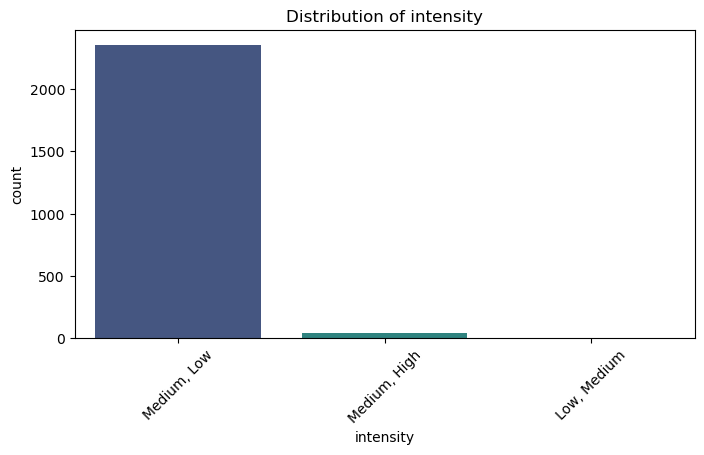


Value counts for intensity:
intensity
Medium, Low     0.983750
Medium, High    0.015833
Low, Medium     0.000417
Name: proportion, dtype: float64


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\3364010001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_new, x=col, palette='viridis')


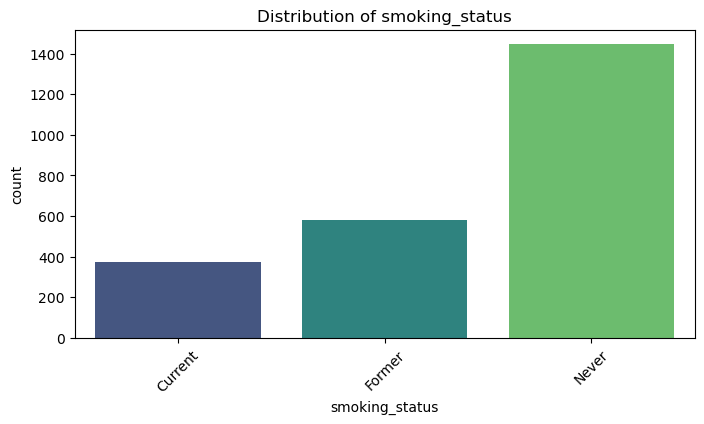


Value counts for smoking_status:
smoking_status
Never      0.602500
Former     0.242083
Current    0.155417
Name: proportion, dtype: float64


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\3364010001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_new, x=col, palette='viridis')


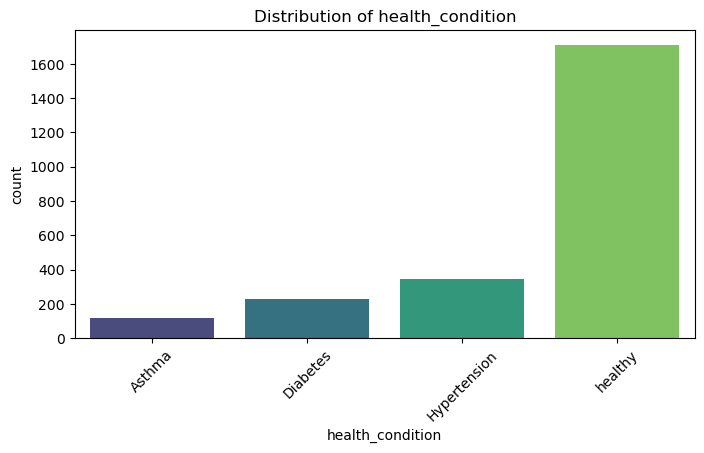


Value counts for health_condition:
health_condition
healthy         0.712917
Hypertension    0.144583
Diabetes        0.094167
Asthma          0.048333
Name: proportion, dtype: float64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_cols = ['gender', 'activity_group', 'intensity', 'smoking_status', 'health_condition']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_new, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    # Print value counts
    print(f"\nValue counts for {col}:")
    print(train_new[col].value_counts(normalize=True))  # Proportions

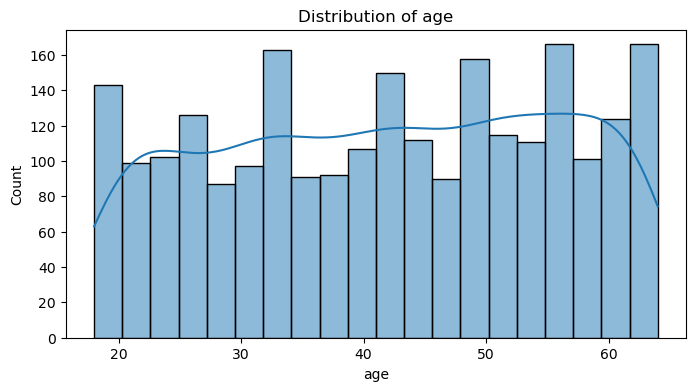


Statistics for age:
count    2400.000000
mean       41.887917
std        13.609005
min        18.000000
25%        30.000000
50%        42.000000
75%        54.000000
max        64.000000
Name: age, dtype: float64


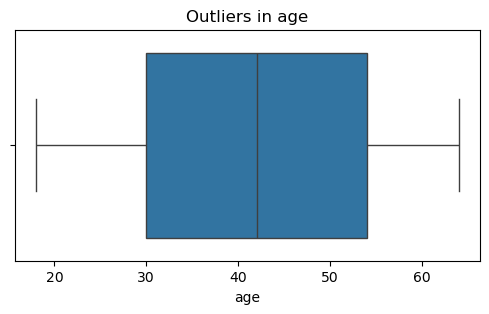

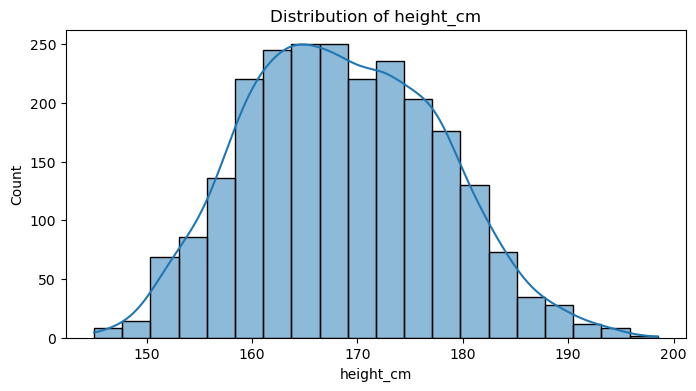


Statistics for height_cm:
count    2400.000000
mean      168.645750
std         9.095034
min       145.000000
25%       161.800000
50%       168.300000
75%       175.400000
max       198.500000
Name: height_cm, dtype: float64


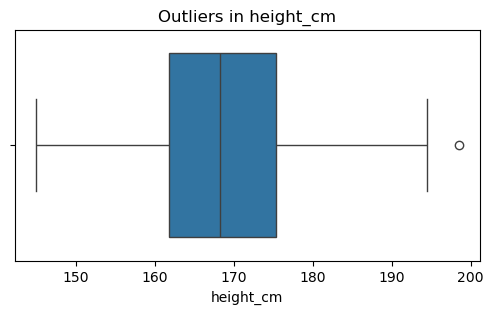

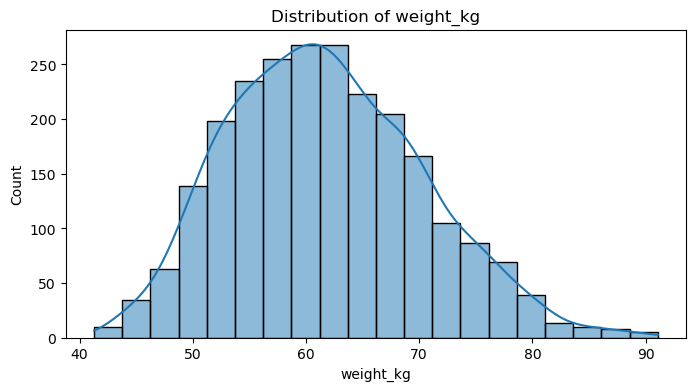


Statistics for weight_kg:
count    2400.000000
mean       61.750192
std         8.511228
min        41.280000
25%        55.430000
50%        61.185000
75%        67.662500
max        91.070000
Name: weight_kg, dtype: float64


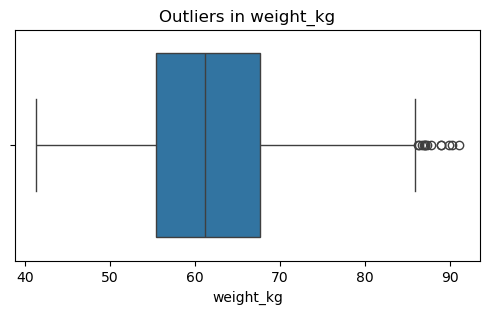

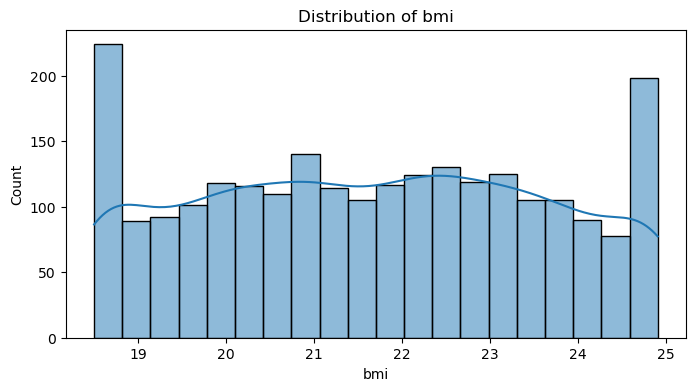


Statistics for bmi:
count    2400.000000
mean       21.658008
std         1.945559
min        18.497983
25%        20.044548
50%        21.684076
75%        23.251695
max        24.901916
Name: bmi, dtype: float64


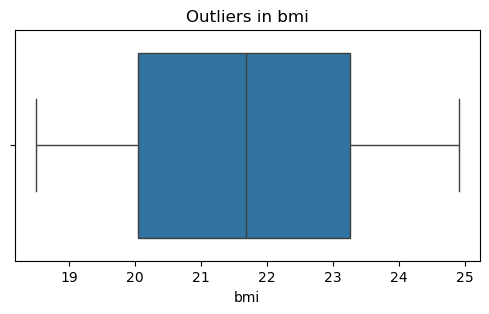

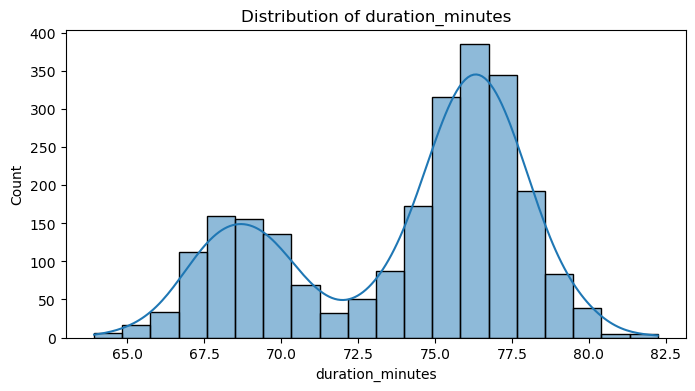


Statistics for duration_minutes:
count    2400.000000
mean       74.034374
std         3.833373
min        63.918220
25%        70.196432
50%        75.411583
75%        76.897571
max        82.235743
Name: duration_minutes, dtype: float64


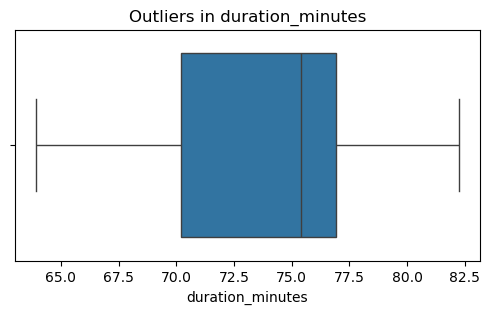

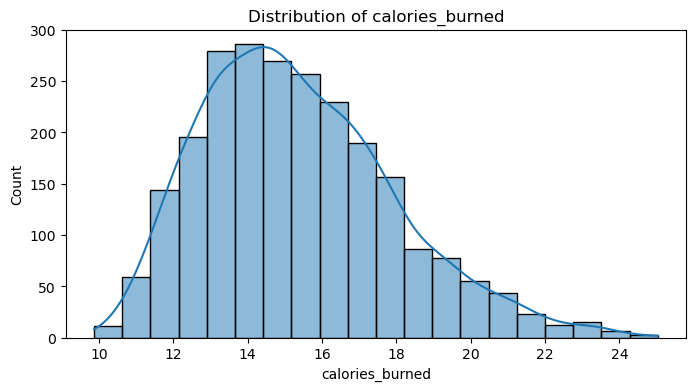


Statistics for calories_burned:
count    2400.000000
mean       15.354259
std         2.586974
min         9.864407
25%        13.394279
50%        15.011312
75%        16.949564
max        25.031696
Name: calories_burned, dtype: float64


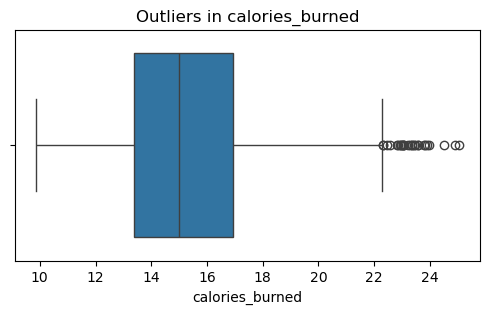

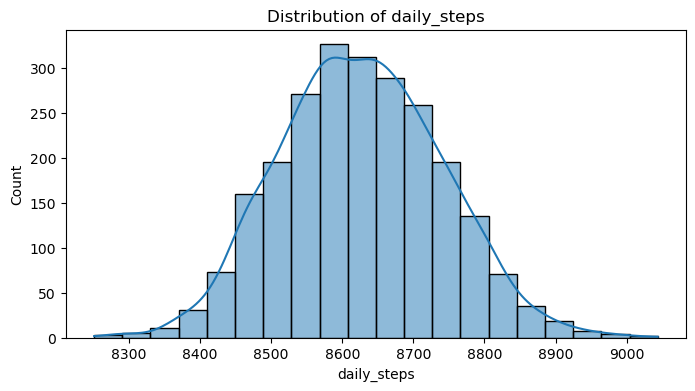


Statistics for daily_steps:
count    2400.000000
mean     8626.343030
std       113.343278
min      8250.776786
25%      8546.688112
50%      8624.012962
75%      8702.361744
max      9043.805310
Name: daily_steps, dtype: float64


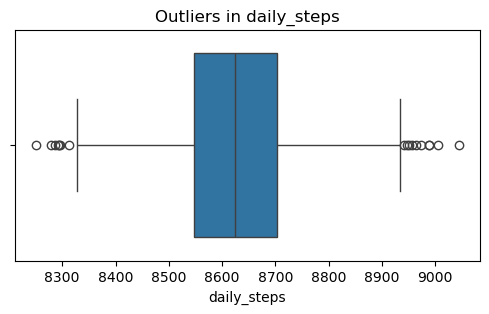

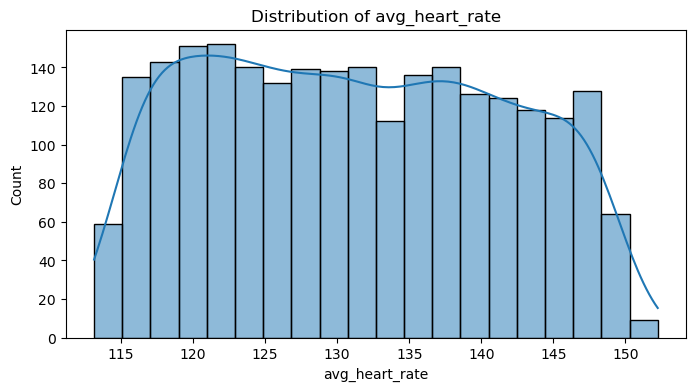


Statistics for avg_heart_rate:
count    2400.000000
mean      131.286778
std        10.141350
min       113.129310
25%       122.411206
50%       130.884793
75%       139.746532
max       152.239130
Name: avg_heart_rate, dtype: float64


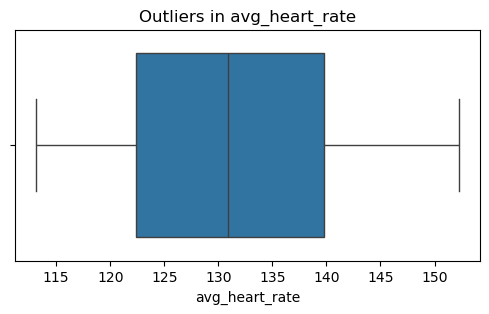

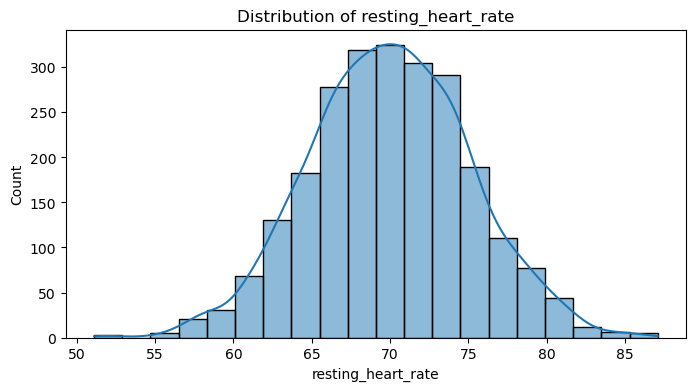


Statistics for resting_heart_rate:
count    2400.000000
mean       69.974125
std         5.088543
min        51.100000
25%        66.500000
50%        70.000000
75%        73.500000
max        87.100000
Name: resting_heart_rate, dtype: float64


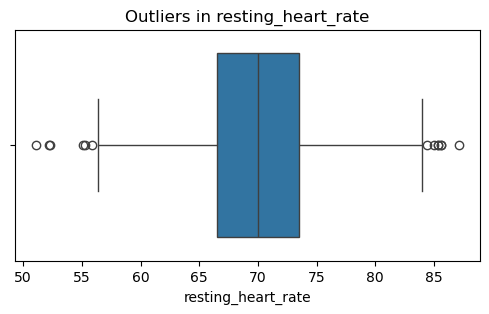

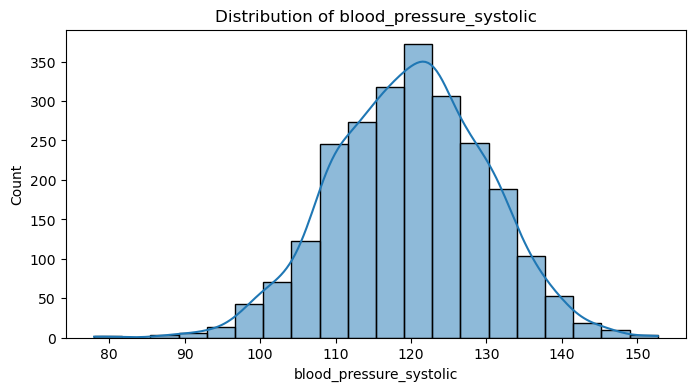


Statistics for blood_pressure_systolic:
count    2400.000000
mean      119.917708
std        10.027990
min        78.000000
25%       112.975000
50%       120.150000
75%       126.900000
max       152.700000
Name: blood_pressure_systolic, dtype: float64


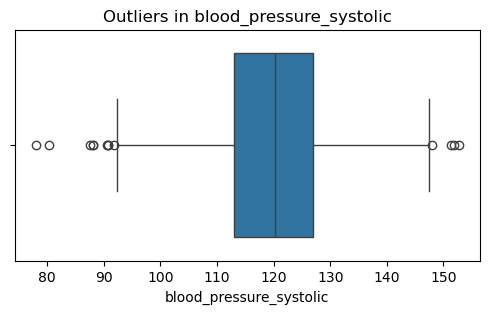

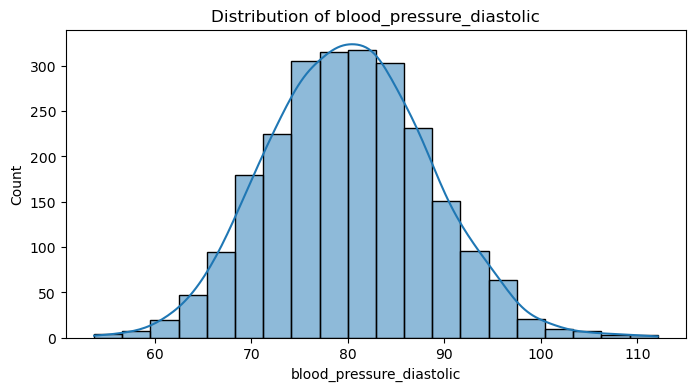


Statistics for blood_pressure_diastolic:
count    2400.000000
mean       80.143458
std         8.313568
min        53.700000
25%        74.500000
50%        80.000000
75%        85.700000
max       112.100000
Name: blood_pressure_diastolic, dtype: float64


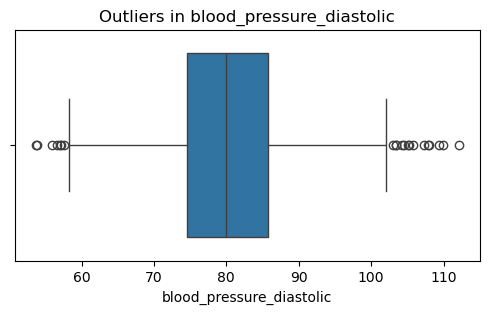

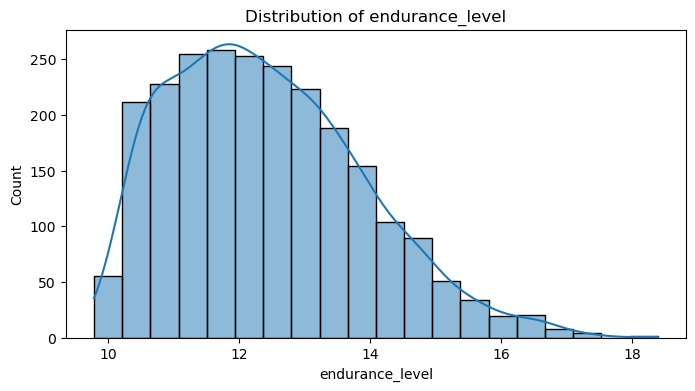


Statistics for endurance_level:
count    2400.000000
mean       12.419742
std         1.469060
min         9.790000
25%        11.270000
50%        12.255000
75%        13.380000
max        18.390000
Name: endurance_level, dtype: float64


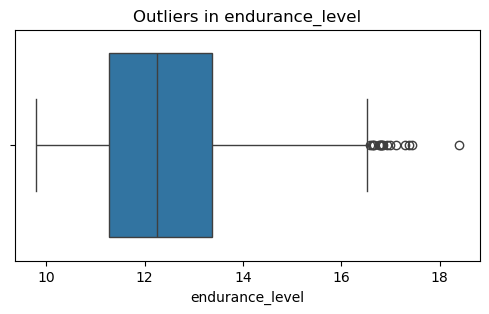

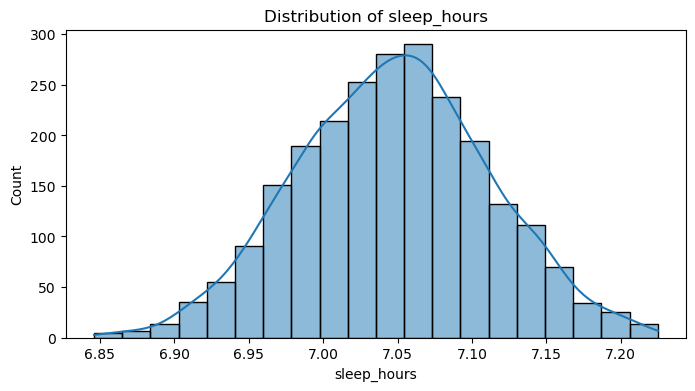


Statistics for sleep_hours:
count    2400.000000
mean        7.047252
std         0.064255
min         6.846083
25%         7.002176
50%         7.048187
75%         7.090378
max         7.224775
Name: sleep_hours, dtype: float64


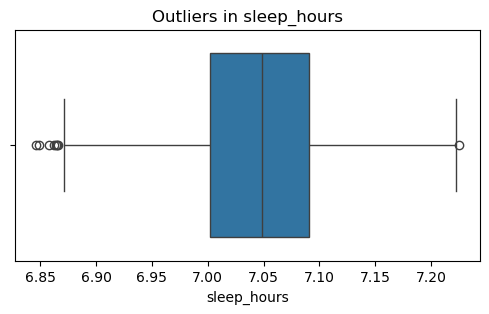

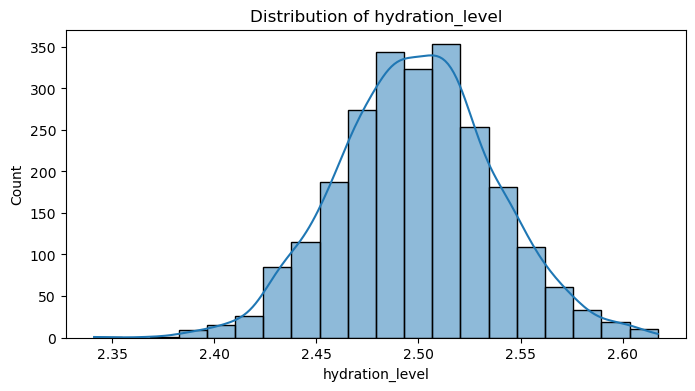


Statistics for hydration_level:
count    2400.000000
mean        2.499016
std         0.038261
min         2.341014
25%         2.473032
50%         2.499093
75%         2.523292
max         2.617241
Name: hydration_level, dtype: float64


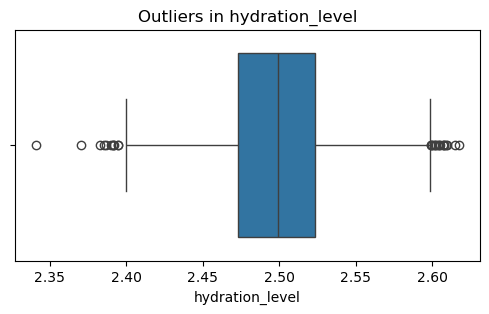

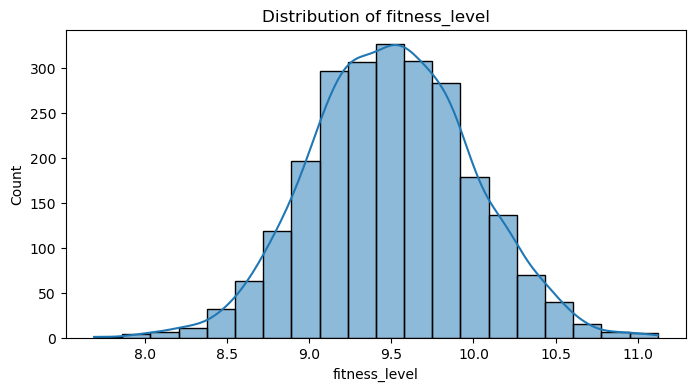


Statistics for fitness_level:
count    2400.000000
mean        9.502269
std         0.482200
min         7.689903
25%         9.177629
50%         9.499742
75%         9.826580
max        11.122008
Name: fitness_level, dtype: float64


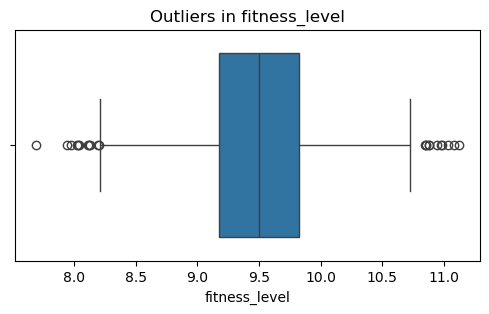

In [27]:
num_cols = ['age', 'height_cm', 'weight_kg', 'bmi', 'duration_minutes', 'calories_burned', 'daily_steps', 'avg_heart_rate', 'resting_heart_rate',
            'blood_pressure_systolic','blood_pressure_diastolic','endurance_level', 'sleep_hours', 'hydration_level', 'fitness_level']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_new, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Summary statistics
    print(f"\nStatistics for {col}:")
    print(train_new[col].describe())
    
    # Boxplot to check outliers
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=train_new, x=col)
    plt.title(f'Outliers in {col}')
    plt.show()

*Bivariate Analysis: Categorical Variables vs. health_condition and Numerical Variables vs. health_condition*


🔹 Bivariate Analysis: gender vs health_condition
health_condition  Asthma  Diabetes  Hypertension  healthy
gender                                                   
F                   4.78      8.02         15.19    72.01
M                   4.83     10.77         13.91    70.48
Other               6.12     10.20         10.20    73.47
Chi-square p-value: 0.3747
❌ Not significant (independent)


<Figure size 600x400 with 0 Axes>

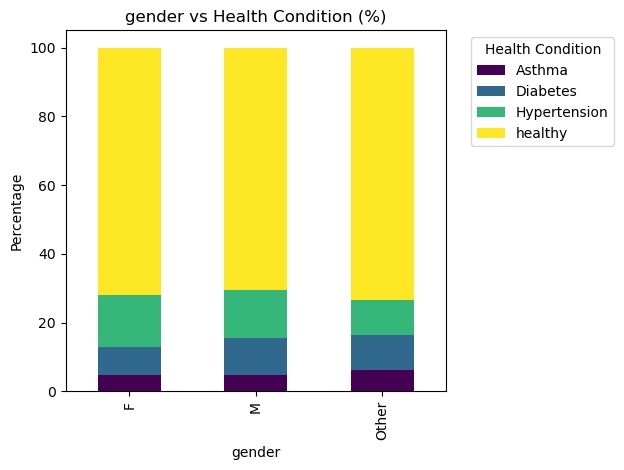


🔹 Bivariate Analysis: activity_group vs health_condition
health_condition                                    Asthma  Diabetes  \
activity_group                                                         
High-Impact Cardio,Low-Impact Cardio,Recreational     5.45      9.09   
High-Impact Cardio,Low-Impact Cardio,Sport-Base...    4.45     11.01   
High-Impact Cardio,Low-Impact Cardio,Strength         4.20      7.74   
High-Impact Cardio,Low-Impact Cardio,Yoga             2.08     18.75   
High-Impact Cardio,Recreational,Sport-Based Cardio    9.52      7.14   
High-Impact Cardio,Recreational,Strength             10.00      8.00   
High-Impact Cardio,Recreational,Yoga                  0.00      0.00   
High-Impact Cardio,Sport-Based Cardio,Strength        4.54     11.34   
High-Impact Cardio,Sport-Based Cardio,Yoga            1.85      3.70   
High-Impact Cardio,Strength,Yoga                      6.15     12.31   
Low-Impact Cardio,Recreational,Sport-Based Cardio     5.41      5.41   
Low-Im

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

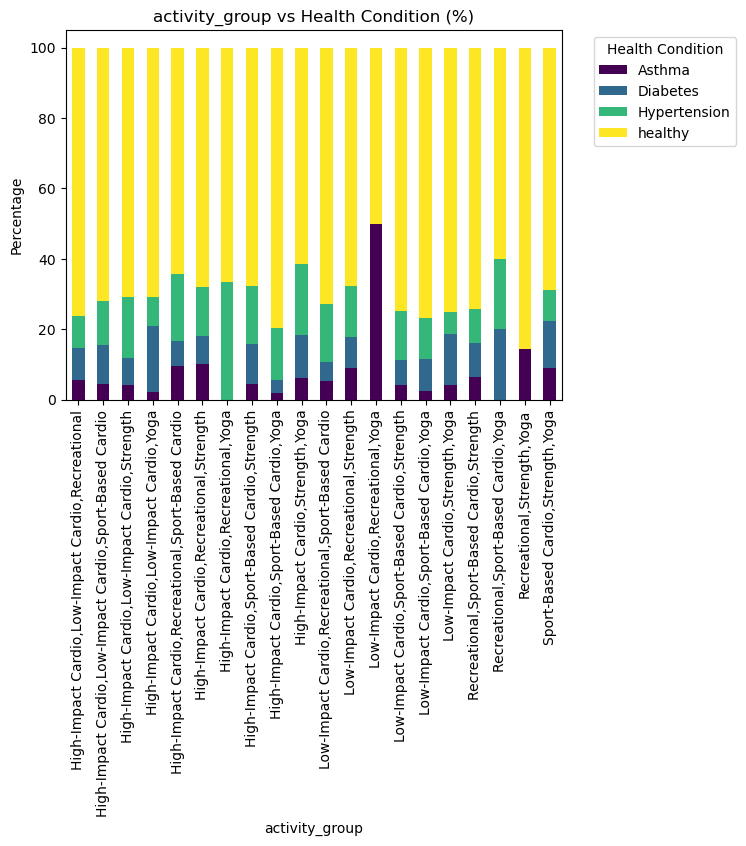


🔹 Bivariate Analysis: intensity vs health_condition
health_condition  Asthma  Diabetes  Hypertension  healthy
intensity                                                
Low, Medium         0.00      0.00          0.00   100.00
Medium, High        0.00     15.79         10.53    73.68
Medium, Low         4.91      9.32         14.53    71.24
Chi-square p-value: 0.6255
❌ Not significant (independent)


<Figure size 600x400 with 0 Axes>

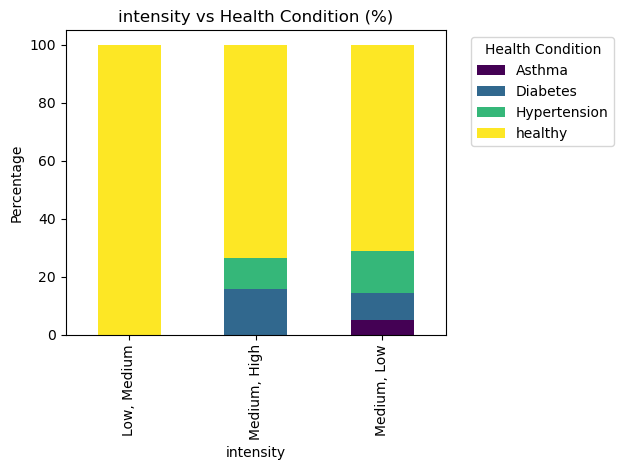


🔹 Bivariate Analysis: stress_level vs health_condition
health_condition  Asthma  Diabetes  Hypertension  healthy
stress_level                                             
4                   5.19      8.65         14.99    71.18
5                   4.54      9.72         14.18    71.56
6                   4.52      9.32         15.07    71.10
7                  10.11      8.99         11.24    69.66
Chi-square p-value: 0.6403
❌ Not significant (independent)


<Figure size 600x400 with 0 Axes>

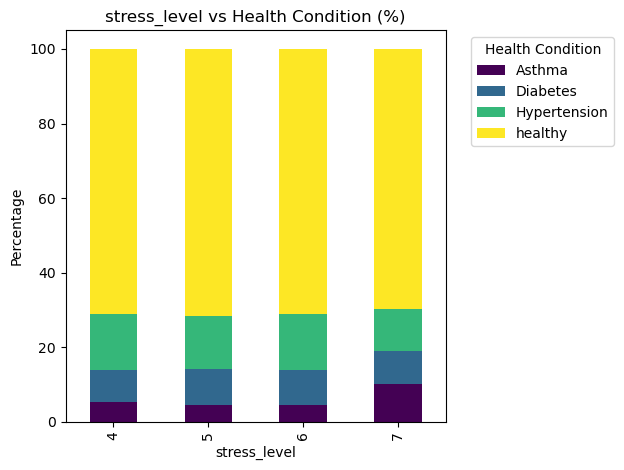


🔹 Bivariate Analysis: smoking_status vs health_condition
health_condition  Asthma  Diabetes  Hypertension  healthy
smoking_status                                           
Current             5.63      8.85         15.01    70.51
Former              5.68      8.95         12.74    72.63
Never               4.29      9.75         15.01    70.95
Chi-square p-value: 0.6160
❌ Not significant (independent)


<Figure size 600x400 with 0 Axes>

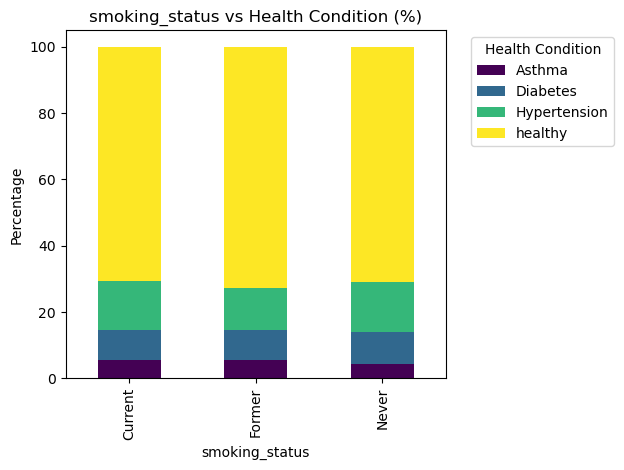


🔹 Bivariate Analysis: age vs health_condition
                       mean        std   min   max
health_condition                                  
Asthma            41.862069  13.033666  18.0  64.0
Diabetes          41.712389  13.944064  18.0  64.0
Hypertension      40.855908  13.522492  18.0  64.0
healthy           42.122151  13.621523  18.0  64.0


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_new, x='health_condition', y=col, palette='viridis')


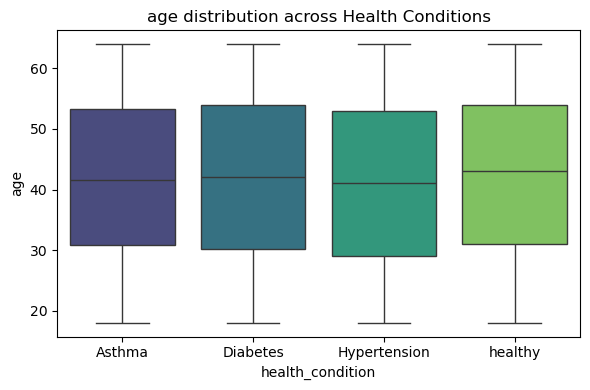

ANOVA p-value: 0.4683
❌ No significant difference

🔹 Bivariate Analysis: height_cm vs health_condition
                        mean       std    min    max
health_condition                                    
Asthma            168.891379  8.797238  151.3  189.0
Diabetes          170.187168  8.819270  149.2  194.3
Hypertension      168.045821  9.354564  148.9  194.5
healthy           168.547165  9.083138  145.0  198.5


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

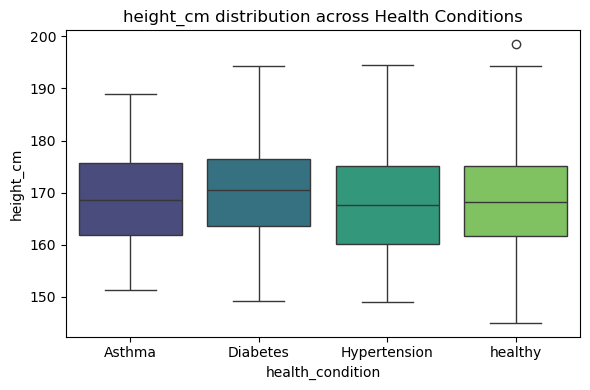

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.0403
✅ Significant difference among groups

🔹 Bivariate Analysis: weight_kg vs health_condition
                       mean       std    min    max
health_condition                                   
Asthma            62.139569  8.280186  46.24  88.95
Diabetes          62.401549  8.575635  43.94  87.12
Hypertension      61.092767  8.849092  43.14  89.03
healthy           61.771087  8.446472  41.28  91.07


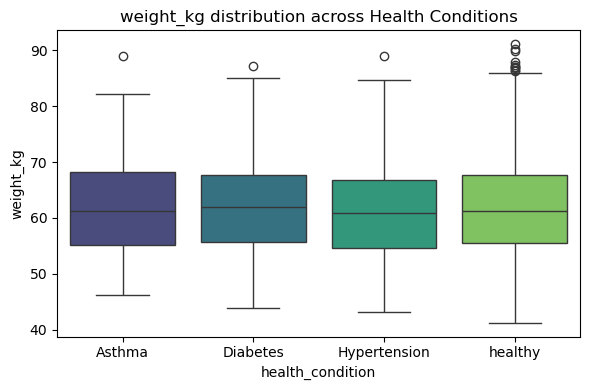

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.3023
❌ No significant difference

🔹 Bivariate Analysis: duration_minutes vs health_condition
                       mean       std        min        max
health_condition                                           
Asthma            73.686040  3.757298  65.683475  80.567757
Diabetes          74.235739  3.756275  65.216071  80.183036
Hypertension      74.040763  3.725877  65.350413  82.235743
healthy           74.030096  3.871325  63.918220  82.100000


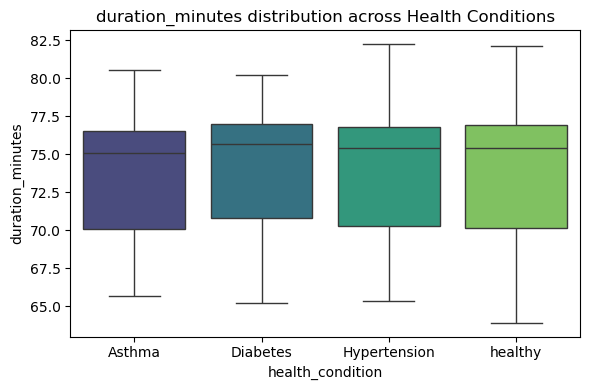

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.6632
❌ No significant difference

🔹 Bivariate Analysis: calories_burned vs health_condition
                       mean       std        min        max
health_condition                                           
Asthma            15.387587  2.717589  10.547679  23.424898
Diabetes          15.521715  2.635903  10.710798  23.369565
Hypertension      15.289105  2.483046  10.856250  24.889960
healthy           15.343095  2.593416   9.864407  25.031696


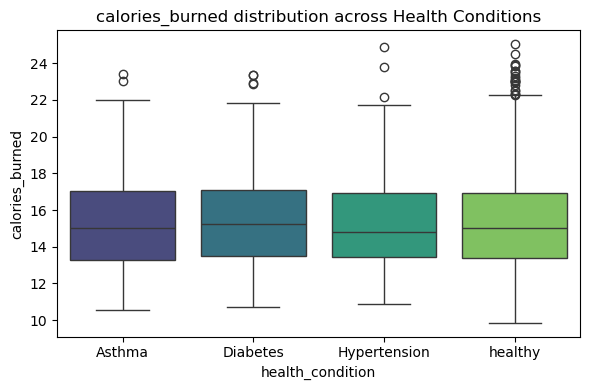

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.7489
❌ No significant difference

🔹 Bivariate Analysis: daily_steps vs health_condition
                         mean         std          min          max
health_condition                                                   
Asthma            8617.270756  102.766056  8410.323529  8846.095890
Diabetes          8626.659270  114.540577  8287.107759  8912.363636
Hypertension      8623.142569  111.068046  8362.057269  9005.096774
healthy           8627.565399  114.373090  8250.776786  9043.805310


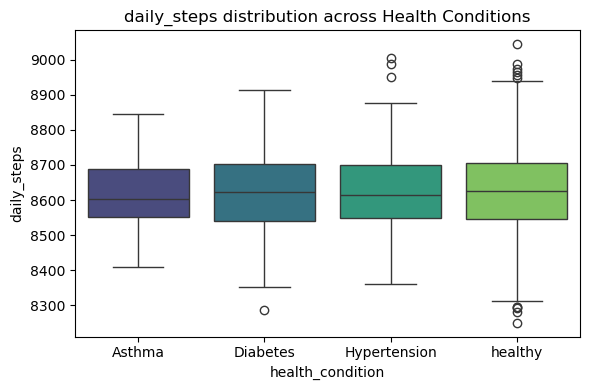

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.7483
❌ No significant difference

🔹 Bivariate Analysis: avg_heart_rate vs health_condition
                        mean        std         min         max
health_condition                                               
Asthma            131.311174   9.613971  113.523207  149.228448
Diabetes          131.421599  10.505437  113.932773  152.068966
Hypertension      132.015128  10.067296  113.325688  150.312500
healthy           131.119603  10.144147  113.129310  152.239130


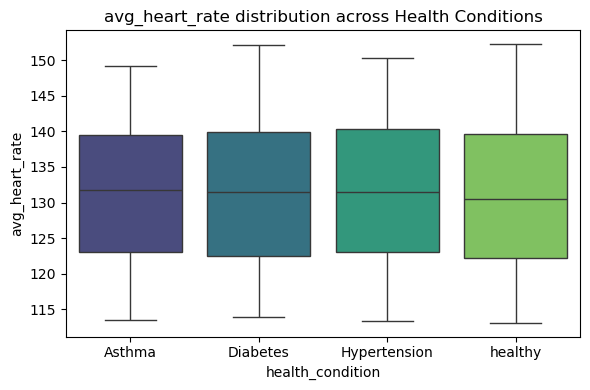

ANOVA p-value: 0.5136
❌ No significant difference

🔹 Bivariate Analysis: resting_heart_rate vs health_condition
                       mean       std   min   max
health_condition                                 
Asthma            70.337931  5.027916  57.5  83.9
Diabetes          69.434513  4.931860  52.2  84.0
Hypertension      70.310951  5.034160  57.1  85.3
healthy           69.952425  5.121227  51.1  87.1


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

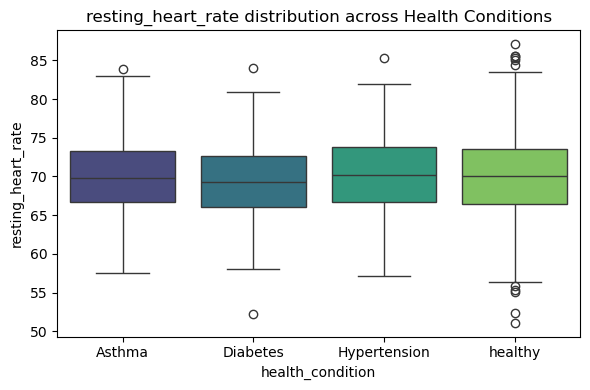

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.1963
❌ No significant difference

🔹 Bivariate Analysis: blood_pressure_systolic vs health_condition
                        mean        std   min    max
health_condition                                    
Asthma            120.586207   9.164031  98.2  138.7
Diabetes          119.629646   9.356712  92.4  146.9
Hypertension      119.951585  10.246080  78.0  145.9
healthy           119.903565  10.130543  80.3  152.7


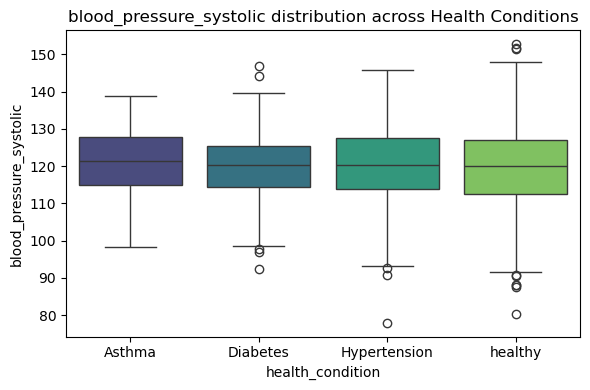

ANOVA p-value: 0.8712
❌ No significant difference

🔹 Bivariate Analysis: blood_pressure_diastolic vs health_condition
                       mean       std   min    max
health_condition                                  
Asthma            79.505172  8.354596  61.1  109.9
Diabetes          79.826549  8.057141  53.7   99.4
Hypertension      80.761671  8.130927  55.9  109.4
healthy           80.103214  8.380374  53.8  112.1


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

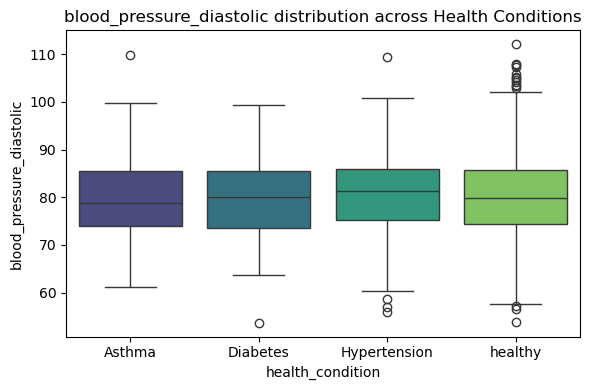

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.3963
❌ No significant difference

🔹 Bivariate Analysis: endurance_level vs health_condition
                       mean       std    min    max
health_condition                                   
Asthma            12.414224  1.480259  10.05  16.50
Diabetes          12.469867  1.424720  10.00  16.80
Hypertension      12.335735  1.481296   9.87  17.43
healthy           12.430532  1.472208   9.79  18.39


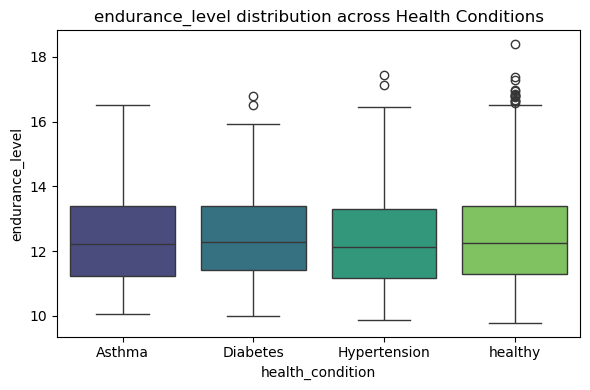

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.6844
❌ No significant difference

🔹 Bivariate Analysis: fitness_level vs health_condition
                      mean       std       min        max
health_condition                                         
Asthma            9.506911  0.465809  8.496791  10.625823
Diabetes          9.449932  0.470236  7.974118  10.708474
Hypertension      9.500651  0.485830  7.689903  10.725121
healthy           9.509195  0.484093  7.939801  11.122008


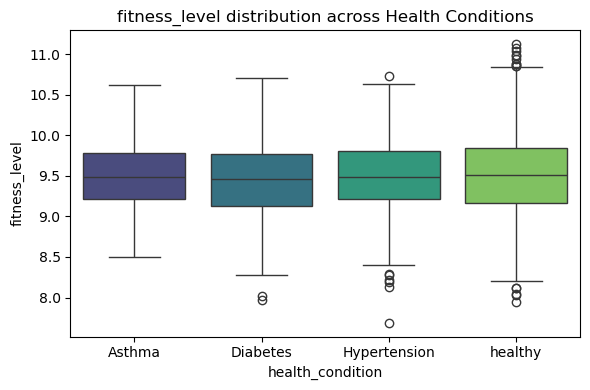

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.3872
❌ No significant difference

🔹 Bivariate Analysis: sleep_hours vs health_condition
                      mean       std       min       max
health_condition                                        
Asthma            7.045177  0.063883  6.864091  7.188688
Diabetes          7.045695  0.062873  6.881250  7.208811
Hypertension      7.047304  0.059010  6.865966  7.212500
healthy           7.047587  0.065516  6.846083  7.224775


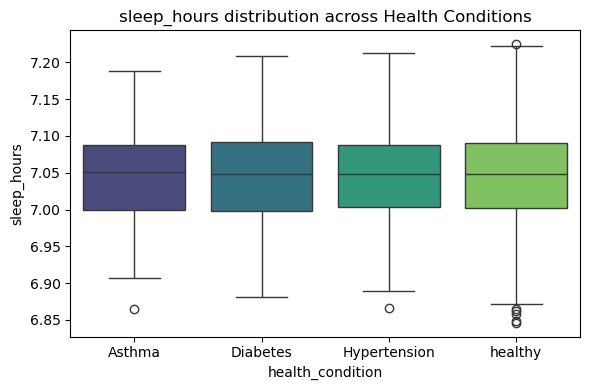

ANOVA p-value: 0.9600
❌ No significant difference

🔹 Bivariate Analysis: hydration_level vs health_condition
                      mean       std       min       max
health_condition                                        
Asthma            2.496325  0.040239  2.391892  2.617241
Diabetes          2.502726  0.036373  2.413063  2.586344
Hypertension      2.499278  0.038208  2.389954  2.607834
healthy           2.498655  0.038379  2.341014  2.614667


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

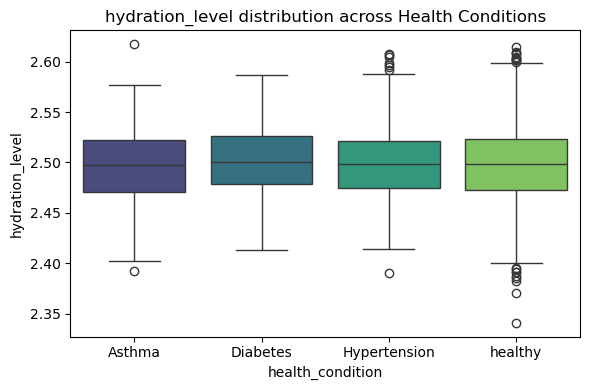

C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = train_new.groupby('health_condition')[col].describe()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

ANOVA p-value: 0.4129
❌ No significant difference

🔹 Bivariate Analysis: bmi vs health_condition
                       mean       std        min        max
health_condition                                           
Asthma            21.746014  1.993714  18.498967  24.901544
Diabetes          21.488870  1.927217  18.498749  24.901544
Hypertension      21.567460  1.984648  18.498333  24.901817
healthy           21.692746  1.936535  18.497983  24.901916


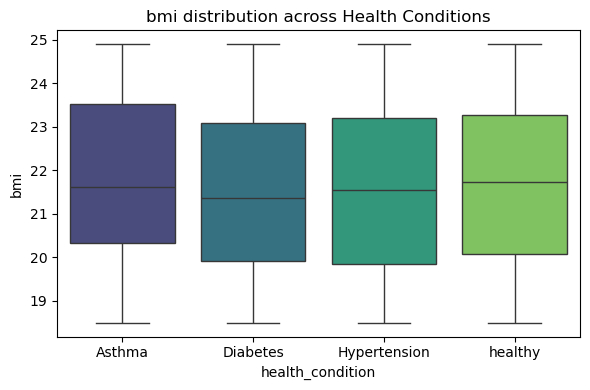

ANOVA p-value: 0.3559
❌ No significant difference


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_11884\1302578830.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway, kruskal

# -----------------------------
# 🔹 Categorical vs health_condition
# -----------------------------
categorical_vars = train_new.select_dtypes(include=['object', 'category']).columns.drop('health_condition')

for col in categorical_vars:
    print(f"\n🔹 Bivariate Analysis: {col} vs health_condition")
    
    # Crosstab
    ct = pd.crosstab(train_new[col], train_new['health_condition'], normalize='index') * 100
    print(ct.round(2))
    
    # Chi-square test
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_new[col], train_new['health_condition']))
    print(f"Chi-square p-value: {p:.4f}")
    if p < 0.05:
        print("✅ Significant relationship (dependent)")
    else:
        print("❌ Not significant (independent)")
    
    # Visualization
    plt.figure(figsize=(6,4))
    ct.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f"{col} vs Health Condition (%)")
    plt.ylabel('Percentage')
    plt.legend(title='Health Condition', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


# -----------------------------
# 🔹 Numerical vs health_condition
# -----------------------------
numerical_vars = train_new.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_vars:
    print(f"\n🔹 Bivariate Analysis: {col} vs health_condition")
    
    # Group summary
    summary = train_new.groupby('health_condition')[col].describe()
    print(summary[['mean', 'std', 'min', 'max']])
    
    # Visualization
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train_new, x='health_condition', y=col, palette='viridis')
    plt.title(f"{col} distribution across Health Conditions")
    plt.tight_layout()
    plt.show()
    
    # Statistical test (ANOVA)
    groups = [group[col].dropna() for name, group in train_new.groupby('health_condition')]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"ANOVA p-value: {p:.4f}")
        if p < 0.05:
            print("✅ Significant difference among groups")
        else:
            print("❌ No significant difference")


🔹 Correlation Matrix:

                           age  height_cm  weight_kg  duration_minutes  \
age                       1.00       0.01       0.02              0.01   
height_cm                 0.01       1.00       0.75              0.01   
weight_kg                 0.02       0.75       1.00              0.01   
duration_minutes          0.01       0.01       0.01              1.00   
calories_burned           0.05       0.66       0.49              0.03   
daily_steps              -0.01      -0.01      -0.02              0.01   
avg_heart_rate           -1.00      -0.01      -0.02             -0.01   
resting_heart_rate        0.00      -0.01      -0.02             -0.02   
blood_pressure_systolic  -0.01      -0.00       0.03              0.01   
blood_pressure_diastolic -0.01      -0.01      -0.01             -0.00   
endurance_level           0.06       0.72       0.54              0.03   
fitness_level             0.03       0.02      -0.00              0.02   
sleep_hours    

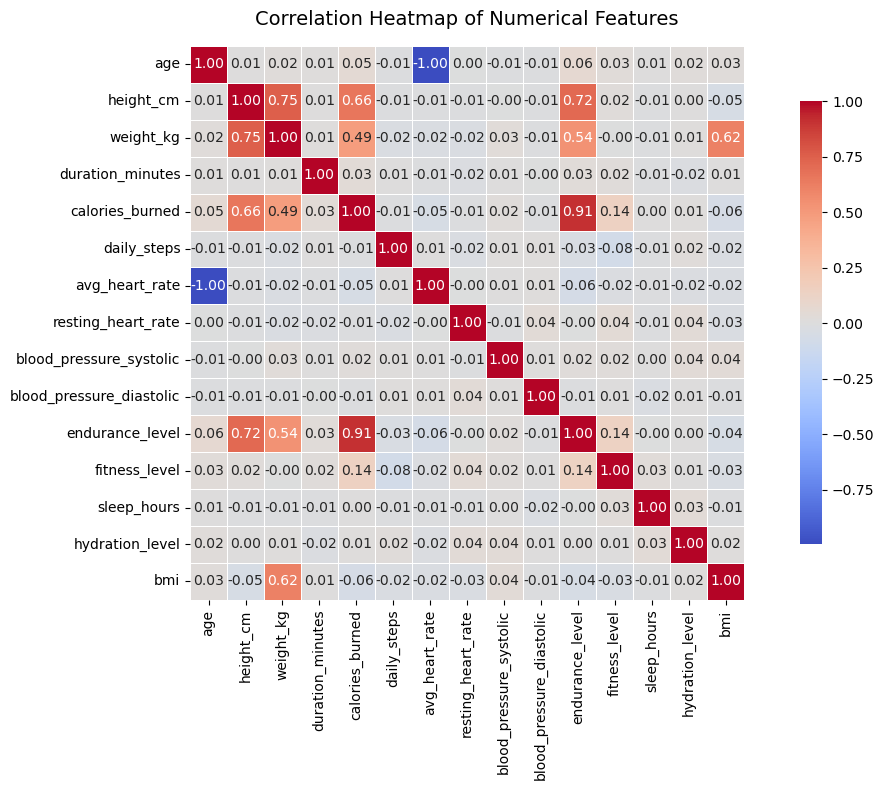

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = train_new.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Display correlation matrix
print("🔹 Correlation Matrix:\n")
print(corr_matrix.round(2))

# Set up the figure
plt.figure(figsize=(12, 8))

# Draw heatmap
sns.heatmap(corr_matrix, 
            annot=True,           # show correlation values
            fmt=".2f",            # 2 decimal places
            cmap="coolwarm",      # color palette
            square=True, 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=15)
plt.tight_layout()
plt.show()


In [30]:
train_new = train_new.drop('weight_kg', axis=1)
test_new = test_new.drop('weight_kg', axis=1)
train_new = train_new.drop('height_cm', axis=1)
test_new = test_new.drop('height_cm', axis=1)

In [31]:
# ✅ Create 'calories_per_step' variable
#train_new['calories_per_step'] = train_new['calories_burned'] / train_new['daily_steps']
#test_new['calories_per_step'] = test_new['calories_burned'] / test_new['daily_steps']

# 🧹 Handle possible division by zero
#train_new['calories_per_step'].replace([float('inf'), -float('inf')], 0, inplace=True)
#test_new['calories_per_step'].replace([float('inf'), -float('inf')], 0, inplace=True)

# ✅ Optionally, fill missing values with 0 or mean
#train_new['calories_per_step'].fillna(0, inplace=True)
#test_new['calories_per_step'].fillna(0, inplace=True)

# 🔍 Quick check
#print(train_new['calories_per_step'].describe())


In [32]:
train_new = train_new.drop('calories_burned', axis=1)
test_new = test_new.drop('calories_burned', axis=1)
#train_new = train_new.drop('daily_steps', axis=1)
#test_new = test_new.drop('daily_steps', axis=1)

🔹 Correlation Matrix:

                           age  duration_minutes  daily_steps  avg_heart_rate  \
age                       1.00              0.01        -0.01           -1.00   
duration_minutes          0.01              1.00         0.01           -0.01   
daily_steps              -0.01              0.01         1.00            0.01   
avg_heart_rate           -1.00             -0.01         0.01            1.00   
resting_heart_rate        0.00             -0.02        -0.02           -0.00   
blood_pressure_systolic  -0.01              0.01         0.01            0.01   
blood_pressure_diastolic -0.01             -0.00         0.01            0.01   
endurance_level           0.06              0.03        -0.03           -0.06   
fitness_level             0.03              0.02        -0.08           -0.02   
sleep_hours               0.01             -0.01        -0.01           -0.01   
hydration_level           0.02             -0.02         0.02           -0.02   
bmi  

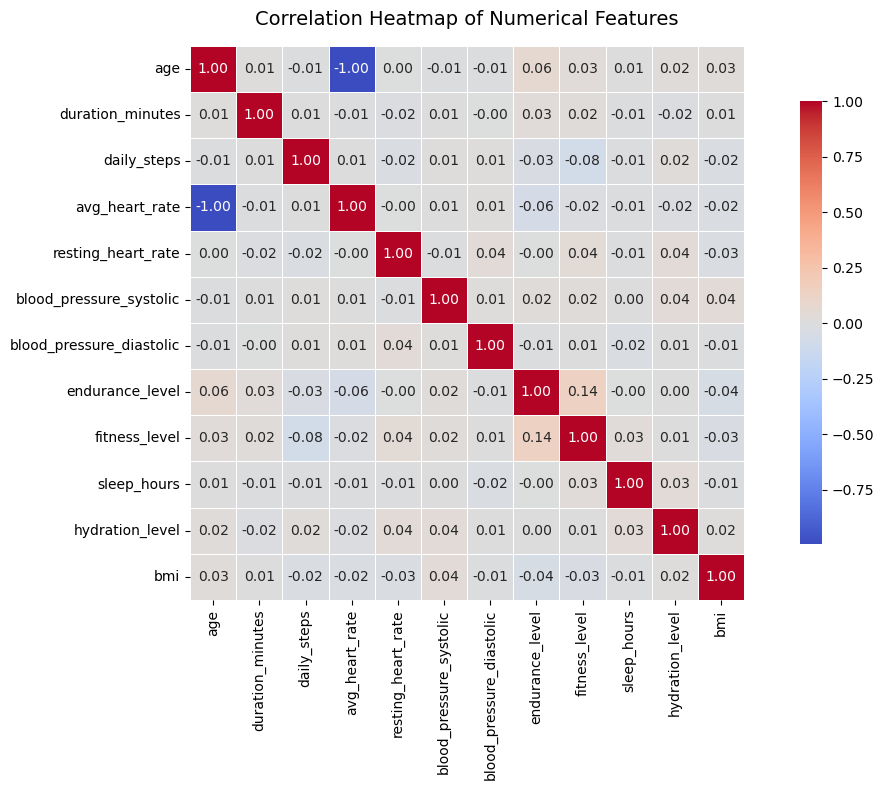

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = train_new.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Display correlation matrix
print("🔹 Correlation Matrix:\n")
print(corr_matrix.round(2))

# Set up the figure
plt.figure(figsize=(12, 8))

# Draw heatmap
sns.heatmap(corr_matrix, 
            annot=True,           # show correlation values
            fmt=".2f",            # 2 decimal places
            cmap="coolwarm",      # color palette
            square=True, 
            linewidths=0.5, 
            cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=15)
plt.tight_layout()
plt.show()


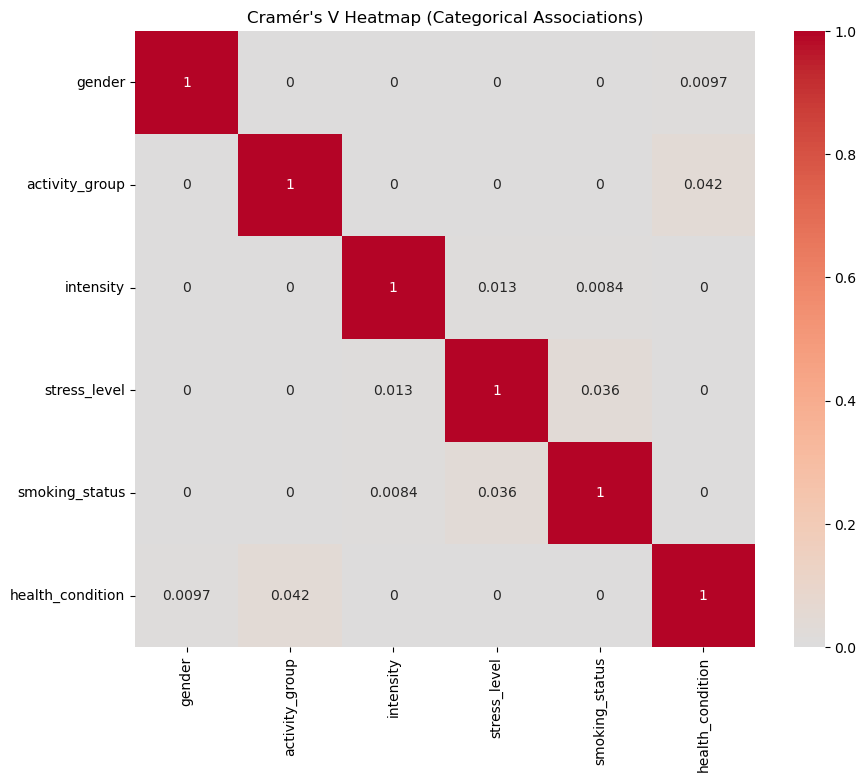

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select categorical columns
cat_cols = train_new.select_dtypes(include=['object', 'category']).columns

# Compute matrix
cramers_results = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(train_new[col1], train_new[col2])

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', center=0)
plt.title("Cramér's V Heatmap (Categorical Associations)")
plt.show()


In [35]:
import numpy as np

def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_means = [values[fcat == i].mean() for i in range(len(np.unique(fcat)))]
    n = len(values)
    overall_mean = values.mean()
    ss_between = np.sum([np.sum(fcat == i) * (m - overall_mean) ** 2 for i, m in enumerate(cat_means)])
    ss_total = np.sum((values - overall_mean) ** 2)
    return np.sqrt(ss_between / ss_total)

# Example
ratio = correlation_ratio(train_new['gender'], train_new['bmi'])
print("Correlation Ratio (η) between gender and bmi:", round(ratio, 3))


Correlation Ratio (η) between gender and bmi: 0.044


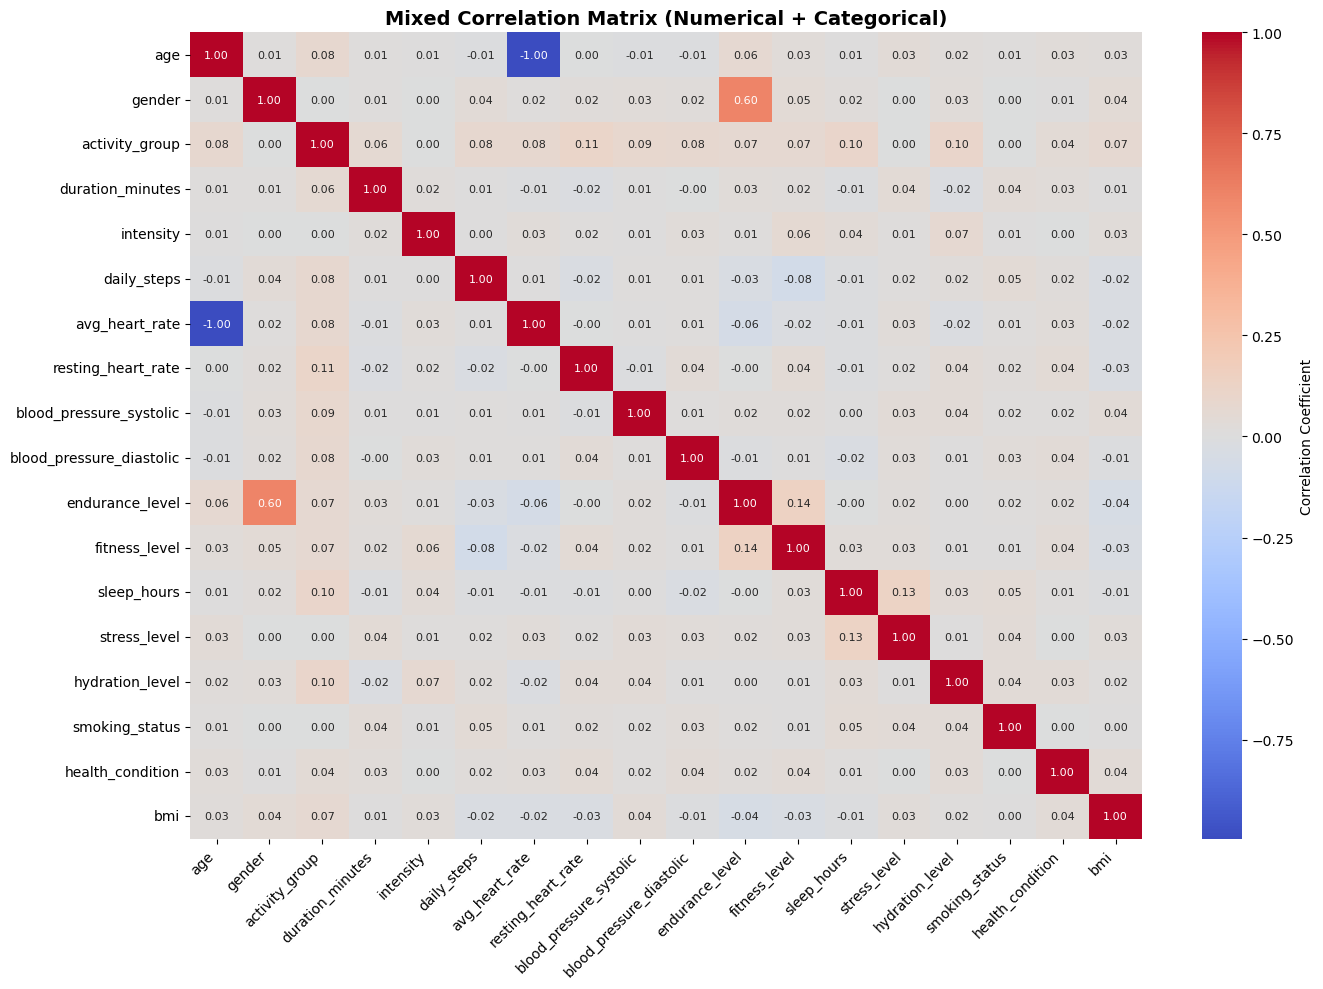

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- Helper functions ---

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_means = [values[fcat == i].mean() for i in range(len(np.unique(fcat)))]
    n = len(values)
    overall_mean = values.mean()
    ss_between = np.sum([np.sum(fcat == i) * (m - overall_mean) ** 2 for i, m in enumerate(cat_means)])
    ss_total = np.sum((values - overall_mean) ** 2)
    return np.sqrt(ss_between / ss_total)

# --- Separate columns by type ---
num_cols = train_new.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_new.select_dtypes(include=['object', 'category']).columns
all_cols = train_new.columns

# --- Create empty correlation matrix ---
corr_matrix = pd.DataFrame(index=all_cols, columns=all_cols)

# --- Compute mixed correlations ---
for col1 in all_cols:
    for col2 in all_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        elif (col1 in num_cols) and (col2 in num_cols):
            corr_matrix.loc[col1, col2] = train_new[[col1, col2]].corr().iloc[0,1]
        elif (col1 in cat_cols) and (col2 in cat_cols):
            corr_matrix.loc[col1, col2] = cramers_v(train_new[col1], train_new[col2])
        else:
            # One categorical, one numerical
            if col1 in cat_cols:
                corr_matrix.loc[col1, col2] = correlation_ratio(train_new[col1], train_new[col2])
            else:
                corr_matrix.loc[col1, col2] = correlation_ratio(train_new[col2], train_new[col1])

corr_matrix = corr_matrix.astype(float)

# --- Plot the mixed correlation heatmap ---
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    center=0, 
    annot=True,         # ✅ Show values
    fmt=".2f",          # ✅ Round to 2 decimal places
    annot_kws={"size":8},  # ✅ Adjust text size for readability
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Mixed Correlation Matrix (Numerical + Categorical)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



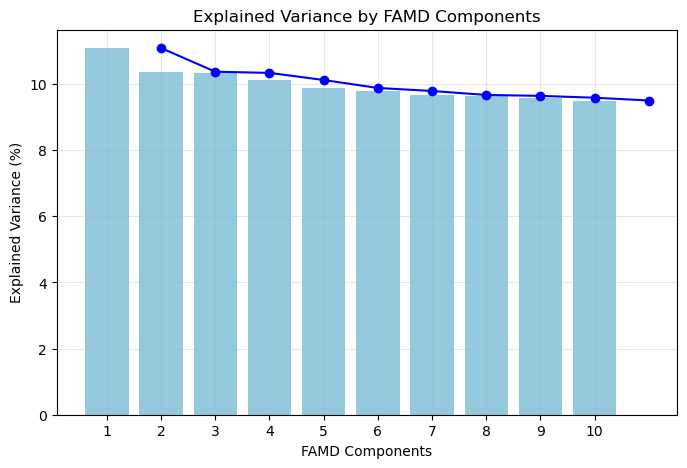

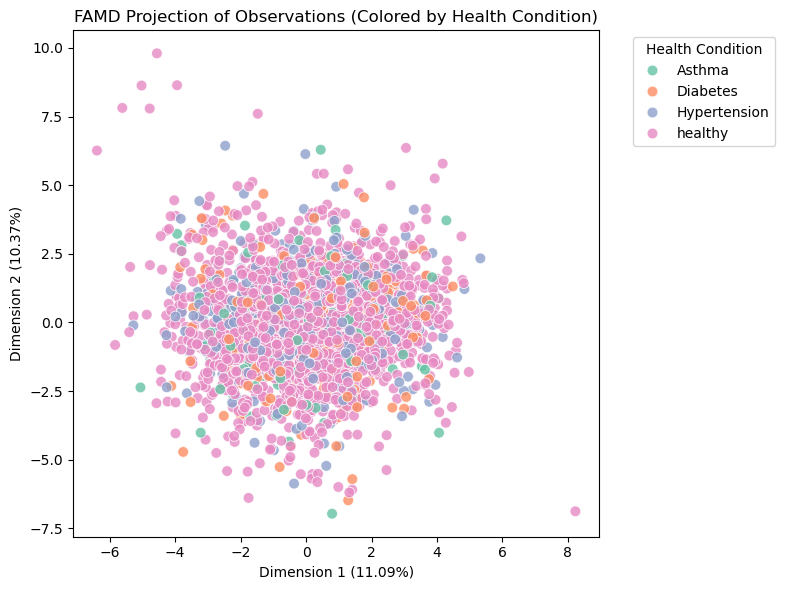

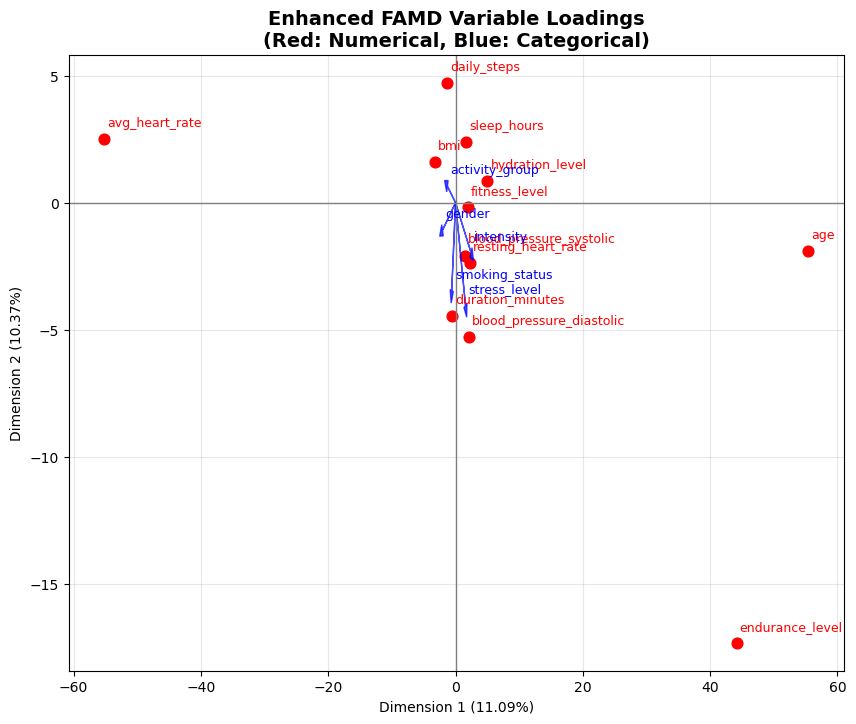

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prince import FAMD

# ===============================
# Step 1: Prepare data
# ===============================
X = train_new.drop(columns=['health_condition'])

# ===============================
# Step 2: Fit FAMD
# ===============================
famd = FAMD(n_components=10, random_state=42)
famd = famd.fit(X)

# ===============================
# Step 3: Compute explained variance manually
# ===============================
row_coords = famd.row_coordinates(X)  # DataFrame of projected observations
total_var = row_coords.to_numpy().var(axis=0).sum()  # sum of variances across components
explained_var = row_coords.to_numpy().var(axis=0) / total_var  # fraction per component
explained_var_percent = explained_var * 100

# Plot explained variance
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1, len(explained_var_percent)+1)), y=explained_var_percent, color='skyblue')
plt.plot(range(1, len(explained_var_percent)+1), explained_var_percent, marker='o', color='blue')
plt.xlabel("FAMD Components")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by FAMD Components")
plt.grid(alpha=0.3)
plt.show()

# ===============================
# Step 4: FAMD projection of observations
# ===============================
famd_proj = row_coords.copy()
famd_proj['health_condition'] = train_new['health_condition']

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=famd_proj,
    x=0, y=1,
    hue='health_condition',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.xlabel(f"Dimension 1 ({explained_var_percent[0]:.2f}%)")
plt.ylabel(f"Dimension 2 ({explained_var_percent[1]:.2f}%)")
plt.title("FAMD Projection of Observations (Colored by Health Condition)")
plt.legend(title="Health Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===============================
# Step 5: Approximate Variable Loadings Plot
# ===============================
# Extract variable coordinates manually
# Use eigenvectors from famd for numerical variables
# For categorical variables, use the mean of indicator coordinates per category
X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=['object', 'category'])

# Row coordinates (already computed)
row_coords = famd.row_coordinates(X)

# For numerical variables: correlation with FAMD dimensions
num_loadings = {}
for col in X_num.columns:
    corr_dim1 = np.corrcoef(X_num[col], row_coords[0])[0,1]
    corr_dim2 = np.corrcoef(X_num[col], row_coords[1])[0,1]
    num_loadings[col] = (corr_dim1*100, corr_dim2*100)  # scale to %

# For categorical variables: approximate contribution
cat_loadings = {}
for col in X_cat.columns:
    # Create dummy variables for categories
    dummies = pd.get_dummies(X_cat[col], drop_first=False)
    # Correlate each dummy with first 2 FAMD dimensions and take mean
    corr_dim1 = np.mean([np.corrcoef(dummies[c], row_coords[0])[0,1] for c in dummies.columns])
    corr_dim2 = np.mean([np.corrcoef(dummies[c], row_coords[1])[0,1] for c in dummies.columns])
    cat_loadings[col] = (corr_dim1*100, corr_dim2*100)  # scale to %

# Plot
plt.figure(figsize=(10,8))

# Plot numerical variables as red points
for col, (x_val, y_val) in num_loadings.items():
    plt.scatter(x_val, y_val, color='red', s=60)
    plt.text(x_val+0.5, y_val+0.5, col, fontsize=9, color='red')

# Plot categorical variables as blue arrows
for col, (x_val, y_val) in cat_loadings.items():
    plt.arrow(0, 0, x_val, y_val, color='blue', alpha=0.7, head_width=0.5, head_length=0.5)
    plt.text(x_val+0.5, y_val+0.5, col, fontsize=9, color='blue')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel(f"Dimension 1 ({explained_var_percent[0]:.2f}%)")
plt.ylabel(f"Dimension 2 ({explained_var_percent[1]:.2f}%)")
plt.title("Enhanced FAMD Variable Loadings\n(Red: Numerical, Blue: Categorical)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()


In [39]:
row_coords = famd.row_coordinates(X)
print(row_coords.head())

component         0         1         2         3         4         5  \
2705       1.742312 -1.042388  1.998822 -2.055798  0.915388 -1.281459   
617       -0.712307 -0.277704  0.124660 -0.694097  0.352186  0.552717   
1933      -2.282454  0.350266  2.184936  0.335182  0.108248 -0.895364   
174        0.141974  1.851538 -1.690082  2.631268 -0.972529 -1.078080   
1735      -3.312477 -2.753701 -1.889020 -1.005826  0.720924 -2.312760   

component         6         7         8         9  
2705       0.533443 -0.936806  0.512102 -2.785060  
617        1.932422 -2.209316 -1.161753 -0.513006  
1933      -1.994441  1.562695  1.728111 -0.766736  
174        2.616974  1.495290  0.768399  7.839583  
1735       0.516405  2.368866  3.674464 -3.119365  


In [40]:
# ===============================
# 🔹 Step 1: Import libraries
# ===============================
import pandas as pd
import numpy as np
from prince import FAMD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume your dataset is train_new
X = train_new.drop(columns=['health_condition'])

# ===============================
# 🔹 Step 2: Evaluate silhouette scores for different FAMD dimensions
# ===============================
for n_comp in [2, 3, 4, 5, 6]:
    famd = FAMD(n_components=n_comp, random_state=42)
    famd_coords = famd.fit_transform(X)

    # Run K-means (you can adjust n_clusters later)
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(famd_coords)

    # Compute silhouette score
    score = silhouette_score(famd_coords, labels)
    print(f"{n_comp} components → Silhouette score = {score:.3f}")


2 components → Silhouette score = 0.319
3 components → Silhouette score = 0.275
4 components → Silhouette score = 0.211
5 components → Silhouette score = 0.164
6 components → Silhouette score = 0.139


For n_clusters = 2, Average Silhouette Score = 0.1506
For n_clusters = 3, Average Silhouette Score = 0.1340
For n_clusters = 4, Average Silhouette Score = 0.1394
For n_clusters = 5, Average Silhouette Score = 0.1387
For n_clusters = 6, Average Silhouette Score = 0.1458
For n_clusters = 7, Average Silhouette Score = 0.1424
For n_clusters = 8, Average Silhouette Score = 0.1327
For n_clusters = 9, Average Silhouette Score = 0.1384
For n_clusters = 10, Average Silhouette Score = 0.1415


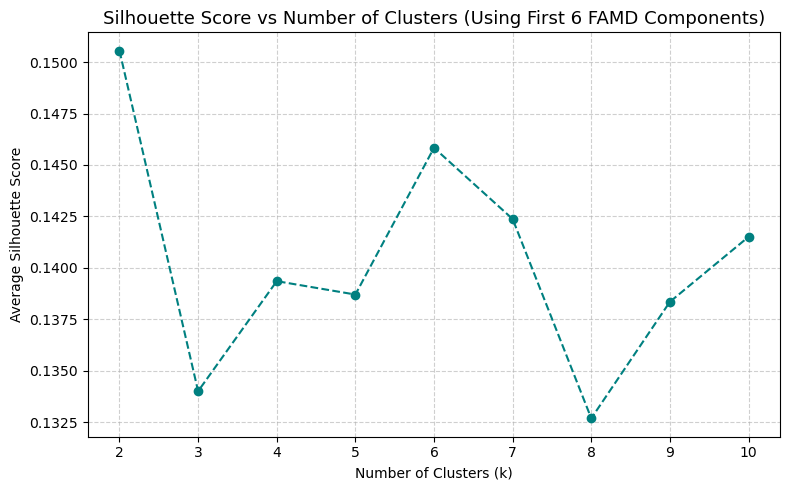


✅ Best number of clusters (highest silhouette score): 2


In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ======================================================
# 🔹 Use FAMD-transformed data (you can choose how many components to include)
# ======================================================
# If you already have 'famd_coords' or 'row_coords' as your FAMD output:
# Example: use first 9 components (or fewer if you only have 2)
famd_features = pd.DataFrame(famd_coords)  # or row_coords if that's your variable name
n_components_to_use = min(9, famd_features.shape[1])  # use up to 9 or total available
famd_subset = famd_features.iloc[:, :n_components_to_use]

# ======================================================
# 🔹 Evaluate silhouette score for different K values
# ======================================================
range_n_clusters = range(2, 11)  # test from 2 to 10 clusters
silhouette_avgs = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(famd_subset)
    silhouette_avg = silhouette_score(famd_subset, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, Average Silhouette Score = {silhouette_avg:.4f}")

# ======================================================
# 🔹 Plot silhouette scores
# ======================================================
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o', linestyle='--', color='teal')
plt.title(f"Silhouette Score vs Number of Clusters (Using First {n_components_to_use} FAMD Components)", fontsize=13)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ======================================================
# 🔹 Print the best K
# ======================================================
best_k = range_n_clusters[silhouette_avgs.index(max(silhouette_avgs))]
print(f"\n✅ Best number of clusters (highest silhouette score): {best_k}")


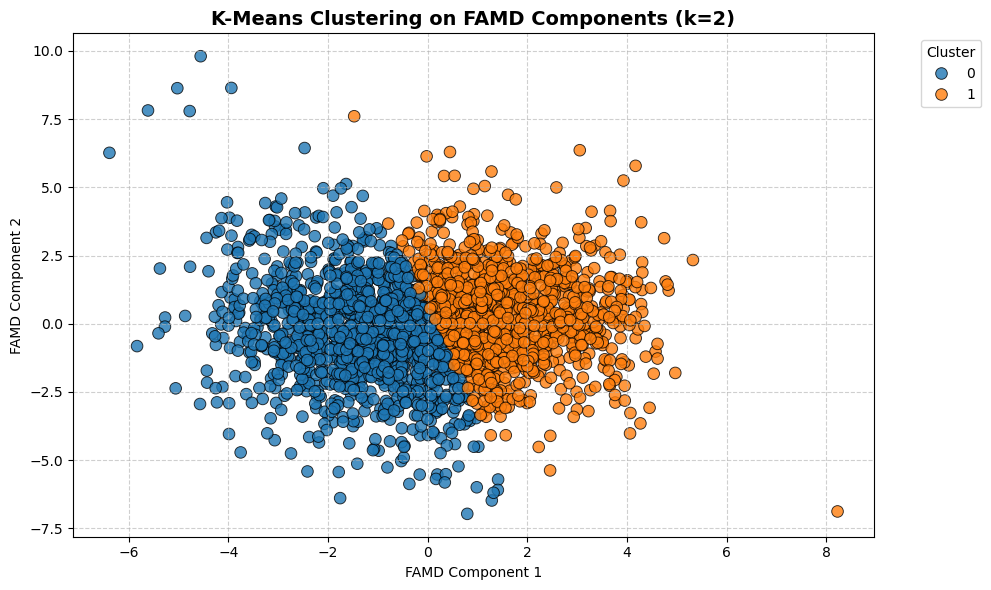

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 🔹 Set number of clusters (use the best_k from silhouette analysis or manually)
# ======================================================
k = 2  # <-- change this to your selected number of clusters (e.g., 2, 3, 4, 5)
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit model and assign clusters
row_coords["Cluster"] = kmeans.fit_predict(row_coords.iloc[:, :2])  # use first 2 FAMD components

# ======================================================
# 🔹 Plot clusters in FAMD space
# ======================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=row_coords,
    x=row_coords.columns[0], 
    y=row_coords.columns[1],
    hue="Cluster",
    palette="tab10",  # auto color palette based on number of clusters
    s=70, edgecolor="k", alpha=0.8
)

# ======================================================
# 🔹 Plot aesthetics
# ======================================================
plt.title(f"K-Means Clustering on FAMD Components (k={k})", fontsize=14, fontweight="bold")
plt.xlabel(f"FAMD Component 1")
plt.ylabel(f"FAMD Component 2")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [43]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Select the numerical components (FAMD output or raw numerical)
data = famd_9d = row_coords.iloc[:, :9]
# Compute mean and covariance matrix
mean_vector = data.mean().values
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute Mahalanobis distance for each point
mahalanobis_distances = data.apply(lambda x: mahalanobis(x, mean_vector, inv_cov_matrix), axis=1)
row_coords['Mahalanobis_Distance'] = mahalanobis_distances

# Define a threshold for outlier detection
threshold = chi2.ppf(0.99, df=data.shape[1])  # 99% confidence level
row_coords['Outlier'] = row_coords['Mahalanobis_Distance'] ** 2 > threshold

# View outliers
outliers_df = row_coords[row_coords['Outlier'] == True]
print(f"Number of multivariate outliers detected: {outliers_df.shape[0]}")


Number of multivariate outliers detected: 100


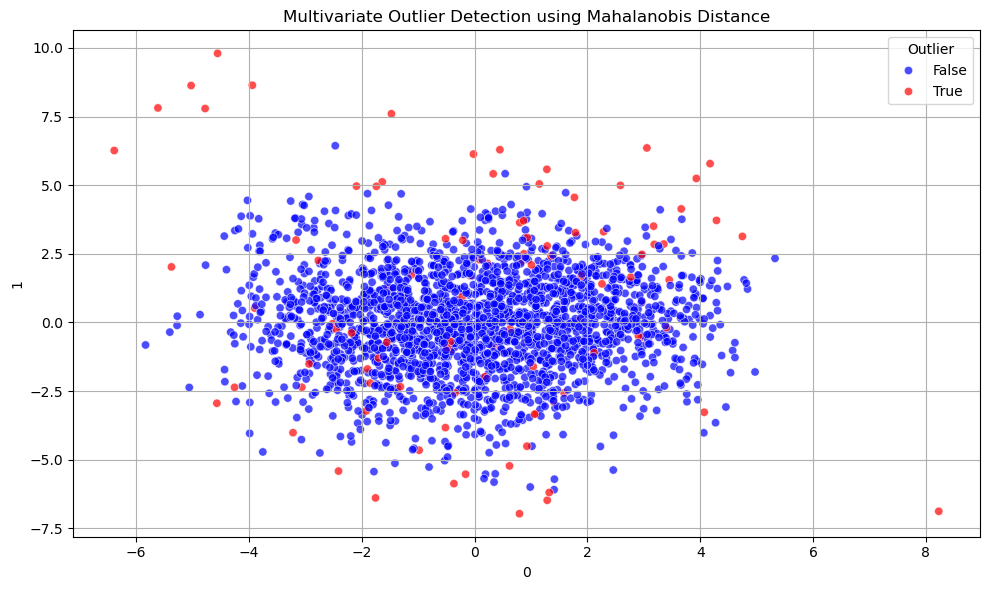

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=row_coords, 
    x=0, y=1,
    hue='Outlier',
    palette={False: 'blue', True: 'red'},
    alpha=0.7
)
plt.title("Multivariate Outlier Detection using Mahalanobis Distance")
plt.grid(True)
plt.tight_layout()
plt.savefig("Multivariate_outliers.png")
plt.show()


In [45]:
# Save training data
train_new.to_csv("Dataset_Train_Final.csv", index=False)

# Save test data
test_new.to_csv("Dataset_Test_Final.csv", index=False)
